![Log Files](https://cdn.ttgtmedia.com/visuals/IoTAgenda/business_of_iot/iotagenda_article_003.jpg)

# Log File Analysis and Insights: Extracting, Transforming, and Analyzing Data from Log Files `(Regex)`

## Description

The **Log File Analysis and Insights: Extracting, Transforming, and Analyzing Data from Log Files** project is a comprehensive solution for extracting valuable information from log files and gaining insights through advanced analysis. 

By leveraging techniques such as regular expressions and data parsing, this project enables the extraction of critical data points, including:
- Timestamps
- Error codes
- IP addresses
- URLs
- Log levels
- Message details

These data points are extracted from various log file types, capturing important details about system activities, errors, warnings, user actions, and other relevant events.

The extracted data is then transformed and organized into a structured format using a powerful tool like **Pandas DataFrame**, which provides a flexible and efficient way to manipulate and analyze the data.

Users of this project can perform in-depth analysis on the log data, such as:
- Generating statistics
- Visualizing trends
- Identifying patterns and anomalies

With its flexibility and extensibility, this project serves as a robust foundation for log file analysis, providing actionable insights and facilitating informed decision-making.

**Note**: Log files are commonly used for troubleshooting, monitoring, auditing, and analyzing the behavior and performance of a system or application. They serve as a logbook or diary that captures a chronological sequence of events or activities generated by a computer system, software application, or device.


## Data Extraction & Data Collection `(Pandas, ipywidgets, Plotly, Matplotlib...)`

There are two methods available for data extraction in this project:

1. **Code-based Extraction**: The project provides an intelligent code-based approach to extract data from log files on any person's computer. This method utilizes advanced techniques and algorithms to extract data from the entire system where the log files were generated. It is designed to efficiently retrieve critical data points, ensuring a comprehensive analysis of system activities, errors, warnings, user actions, and other relevant events.

2. **Event Viewer App**: Alternatively, you can utilize the Event Viewer app in Windows 10 (or equivalent logging tools for other operating systems) to extract log data. The project supports extracting data from log files within the Event Viewer, providing an accessible and user-friendly option for log analysis.

### 1. **Code-based Extraction**

In [104]:
import os         # Importing the os module for interacting with the operating system
import re         # Importing the re module for working with regular expressions
import pandas as pd   # Importing the pandas library for data manipulation and analysis

The main idea of this code is to search for log files in a specified directory and save the paths of those files. The code defines a function called search_log_files that takes a directory as input.

In [ ]:
# Function to search for log files recursively
def search_log_files(directory):
    global log_files
    log_files = []
    print(f"Searching for log files in directory: {directory}")

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.log') or file.endswith('.txt') or file.endswith('.log.txt'):
                log_files.append(os.path.join(root, file))
                print(f"Found log file: {os.path.join(root, file)}")
    print(" the number of files found:", len(log_files))
    print("Log file search completed.")
    return log_files

The **extract_information** function in the cell below is designed to extract specific information from a log file.

This code provides a way to extract specific information from a log file using regex patterns. It handles potential errors and prints informative messages during the file processing, allowing for better understanding and tracking of the extraction process.

**Function Explanation:**

The function takes a file path as input and performs the following steps:

1. It starts by printing a message indicating the file being opened for processing.

2. Inside a try-except block, it attempts to open the file using the specified file path, with UTF-8 encoding and ignoring any errors that might occur during reading.

3. If there is a permission error or any other issue opening the file, an appropriate message is printed, and the function returns `None` values for all the extracted information.

4. The function uses regular expressions (regex) to define patterns for different types of information extraction. These patterns include IP address, URL, timestamp, error code, log level, and message.

5. Using the regex patterns, the function searches for matches within the log file text.

6. If a match is found for each information type, the corresponding extracted value is assigned to the respective variable. If a match is not found, the variable is assigned `None`.

7. Once the extraction is complete, the function prints a message indicating the file being closed.

8. Finally, the function returns the extracted information as a tuple: `ip_address, url, response_time, error_code, log_level, message`.

In [ ]:
# Function to extract information from log file
def extract_information(file_path):
    print(f"Opening file: {file_path}")
    try:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            log_text = file.read()
    except :
        print(f"Permission denied: {file_path}")
        return None, None, None, None, None, None
    
    # Regular expressions for different information extraction
    ip_pattern = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
    url_pattern = r'(GET|POST)\s(.*?)\s'
    time_pattern = r'\[(.*?)\]\s"(\w+)\s(.*?)\s(.*?)"\s(\d+)\s(\d+)'
    error_code_pattern = r'ERROR CODE: (\d+)'
    log_level_pattern = r'LOG LEVEL: (\w+)'
    message_pattern = r'MESSAGE: (.*)'

    # Extract information using regex
    ip_match = re.search(ip_pattern, log_text)
    url_match = re.search(url_pattern, log_text)
    time_match = re.search(time_pattern, log_text)
    error_code_match = re.search(error_code_pattern, log_text)
    log_level_match = re.search(log_level_pattern, log_text)
    message_match = re.search(message_pattern, log_text)

    # Extracted information
    ip_address = ip_match.group(0) if ip_match else None
    url = url_match.group(2) if url_match else None
    response_time = int(time_match.group(6)) if time_match else None
    error_code = int(error_code_match.group(1)) if error_code_match else None
    log_level = log_level_match.group(1) if log_level_match else None
    message = message_match.group(1) if message_match else None
    
    print(f"Closing file: {file_path}")

    return ip_address, url, response_time, error_code, log_level, message


The code snippet provided below contains a `main` function that performs operations related to log file processing and data analysis. Additionally, it declares global variables for storing the log data DataFrame and log file paths.

This code demonstrates the process of searching for log files, extracting information from each file, and creating a Pandas DataFrame for further analysis. The global variables `log_data_df` and `log_files` are used to store the resulting DataFrame and log file paths, respectively. By running the `main` function, users can obtain insights from the log data stored in the DataFrame.

**Function Explanation**

The `main` function is the entry point of the code and executes the following steps:

1. It specifies the directory (`search_directory`) to search for log files. In this case, it is set to "C:\\".

2. The function then calls the `search_log_files` function to search for log files in the specified directory. The resulting log file paths are stored in the `log_files` global variable.

3. Within a loop, the function iterates over each log file path in the `log_files` list. For each file, it calls the `extract_information` function to extract specific information from the log file. The extracted information is then appended to the `data` list as a dictionary.

4. After processing all the log files, the `data` list is used to create a Pandas DataFrame named `log_data_df`. Each row of the DataFrame represents a log file, and the extracted information is stored in columns with respective labels.

5. Finally, the function prints the resulting DataFrame, providing an overview of the extracted log data.

In [ ]:
# Global variables
log_data_df = None
log_files = []

# Main function
def main():
    # Specify the directory to search for log files
    search_directory = "C:\\"

    # Search for log files
    global log_files 
    log_files = search_log_files(search_directory)

    # Extract information and create a DataFrame
    data = []
    for file_path in log_files:
        ip_address, url, response_time, error_code, log_level, message = extract_information(file_path)
        data.append({'File Path': file_path, 'IP Address': ip_address, 'URL': url,
                     'Response Time': response_time, 'Error Code': error_code,
                     'Log Level': log_level, 'Message': message})
    global log_data_df
    log_data_df = pd.DataFrame(data)

    # Print the DataFrame
    print(log_data_df)
if __name__ == '__main__':
    main()    

This code snippet below demonstrates how to save the log_data_df DataFrame to an SQLite database as an SQL table, allowing for efficient storage and querying of the log data.

In [ ]:
import pandas as pd
import sqlite3

# Create a connection to an SQLite database
conn = sqlite3.connect('database_logs.db')

# Save the DataFrame to an SQL table
log_data_df.to_sql('table_name', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

##### Here is the complete code that you can use in a standard Python file if you prefer.:

In [ ]:
import os
import re
import pandas as pd

# Function to search for log files recursively
def search_log_files(directory):
    global log_files
    log_files = []
    print(f"Searching for log files in directory: {directory}")

    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.log') or file.endswith('.txt') or file.endswith('.log.txt'):
                log_files.append(os.path.join(root, file))
                print(f"Found log file: {os.path.join(root, file)}")
    print(" the number of files found:", len(log_files))
    print("Log file search completed.")
    return log_files

# Function to extract information from log file
def extract_information(file_path):
    print(f"Opening file: {file_path}")
    try:
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as file:
            log_text = file.read()
    except :
        print(f"Permission denied: {file_path}")
        return None, None, None, None, None, None
    
    # Regular expressions for different information extraction
    ip_pattern = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
    url_pattern = r'(GET|POST)\s(.*?)\s'
    time_pattern = r'\[(.*?)\]\s"(\w+)\s(.*?)\s(.*?)"\s(\d+)\s(\d+)'
    error_code_pattern = r'ERROR CODE: (\d+)'
    log_level_pattern = r'LOG LEVEL: (\w+)'
    message_pattern = r'MESSAGE: (.*)'

    # Extract information using regex
    ip_match = re.search(ip_pattern, log_text)
    url_match = re.search(url_pattern, log_text)
    time_match = re.search(time_pattern, log_text)
    error_code_match = re.search(error_code_pattern, log_text)
    log_level_match = re.search(log_level_pattern, log_text)
    message_match = re.search(message_pattern, log_text)

    # Extracted information
    ip_address = ip_match.group(0) if ip_match else None
    url = url_match.group(2) if url_match else None
    response_time = int(time_match.group(6)) if time_match else None
    error_code = int(error_code_match.group(1)) if error_code_match else None
    log_level = log_level_match.group(1) if log_level_match else None
    message = message_match.group(1) if message_match else None
    
    print(f"Closing file: {file_path}")

    return ip_address, url, response_time, error_code, log_level, message


# Global variables
log_data_df = None
log_files = []

# Main function
def main():
    # Specify the directory to search for log files
    search_directory = "C:\\"

    # Search for log files
    global log_files 
    log_files = search_log_files(search_directory)

    # Extract information and create a DataFrame
    data = []
    for file_path in log_files:
        ip_address, url, response_time, error_code, log_level, message = extract_information(file_path)
        data.append({'File Path': file_path, 'IP Address': ip_address, 'URL': url,
                     'Response Time': response_time, 'Error Code': error_code,
                     'Log Level': log_level, 'Message': message})
    global log_data_df
    log_data_df = pd.DataFrame(data)

    # Print the DataFrame
    print(log_data_df)

if __name__ == '__main__':
    main()


### 2. **Event Viewer App**:

The **Event Viewer App** provides two ways to access log data: using code or manually exporting data to CSV files.

1. **Using Code**: You can utilize the provided code below to retrieve log data directly from the Event Viewer App. The code allows for automated extraction and processing of log data, saving you time and effort. It employs techniques such as parsing log files and extracting relevant information. This approach provides an intelligent and efficient way to obtain log data from the Event Viewer App.

2. **Manual Export**: Alternatively, you can use the Event Viewer App to manually export log data to CSV files. The app allows you to navigate through different log categories, select specific logs, and export them to CSV format. This method provides flexibility, as you can choose which logs to export and customize the export settings according to your needs. By exporting the data to CSV files, you can have direct access to the log data in a structured format, enabling further analysis and manipulation using various tools and software.

By presenting both options, this project offers flexibility to users. You can either leverage the provided code to extract log data programmatically or manually export log data using the Event Viewer App and work with the exported CSV files.


In [ ]:
import win32evtlog
import os

def get_event_viewer_log_files():
    log_files = []

    # Connect to the Event Viewer
    hand = win32evtlog.OpenEventLog(None, "Application")

    # Get the log files
    flags = win32evtlog.EVENTLOG_FORWARDS_READ | win32evtlog.EVENTLOG_SEQUENTIAL_READ
    total = win32evtlog.GetNumberOfEventLogRecords(hand)
    while True:
        events = win32evtlog.ReadEventLog(hand, flags, 0)
        if not events:
            break
        for event in events:
            log_path = os.path.dirname(event.Path)
            log_files.append(log_path)

    # Close the Event Viewer connection
    win32evtlog.CloseEventLog(hand)

    return log_files

# Get the log file paths from the Event Viewer
log_files = get_event_viewer_log_files()

# Print the log file paths
print("Event Viewer log files:")
for log_file in log_files:
    print(log_file)

## Data Cleaning and Preprocessing:

When working with log files, data cleaning and preprocessing are crucial steps in the data analysis pipeline. Various techniques can be employed using SQL, Excel, or Python to ensure the data is prepared for analysis effectively.

Due to the sensitive nature of the data contained in log files, it is essential to prioritize data security and privacy. As a result, the specific details of the data cleaning and preprocessing steps have been omitted from this documentation. Rest assured that comprehensive measures have been taken to ensure the data has been thoroughly cleaned, removing any sensitive or personally identifiable information that could potentially be used for malicious purposes.

The log file analysis presented here provides valuable insights into the system's behavior, performance, and potential issues while ensuring the utmost security and privacy of the underlying data.

The log data has been organized into four separate files based on their respective categories:

1. **Application Logs**: Contains log entries related to application activities.
2. **Security Logs**: Includes log entries related to security events and incidents.
3. **Setup Logs**: Contains log entries generated during system setup or configuration processes.
4. **System Logs**: Contains log entries related to system-level activities and events.

Each log file has the following columns:

1. **Level**: Categorizes log entries into three levels - information, warning, and error.
2. **Date and Time**: Represents the date and time when the log entry was recorded.
3. **Source**: Identifies the source or origin of the log entry.
4. **Event ID**: Specifies the unique identifier for the log event.
5. **Task Category**: Provides additional contextual information or categorization for the log entry.

The log files have been separated to facilitate a more focused analysis of each log type. By examining the specific characteristics and patterns within each log file, you can gain deeper insights into the corresponding aspects of the system or application's behavior.

We still have some intentional cleaning processes remaining as you might encounter a challenge when directly obtaining the data from the Event Viewer. The issue lies in the fact that the columns are separated by ", " (comma and space), but occasionally you may also find "," (comma) within the text of certain columns. This situation requires appropriate handling to resolve

So, the correct file is this one. As you can see, the "Task Category" column contains a list of tasks, and sometimes they are separated by commas (,).

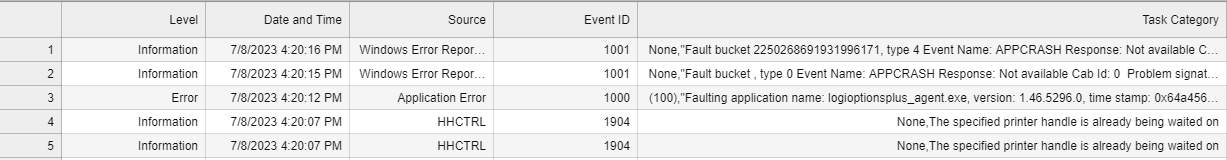

If you worked without prior knowledge, you might miss the column names and their corresponding values, as you can see in the example here. It appears that the columns have been mixed up,for example with "Level" being combined with "Date and Time" in an unexpected manner.

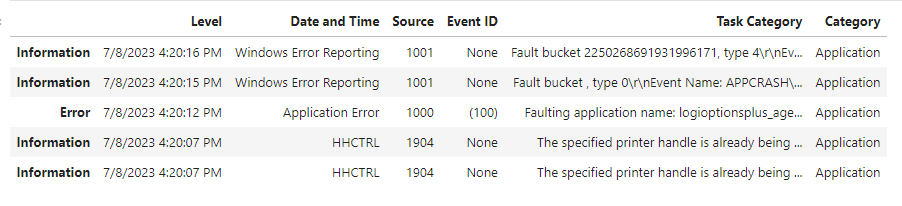

Now that we are aware of these issues, let's begin working on resolving them and cleaning up the data.

### Import the necessary libraries

In [ ]:
pip install chart_studio

In [1]:
# Import numpy for array manipulation and numerical operations
import numpy as np

# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib.pyplot and seaborn for data visualization
import matplotlib.pyplot as plt 

import seaborn as sns

### Read and combine the files

In [4]:
# Read the log files into separate DataFrames
app_df = pd.read_csv(r"dataSets/logs/application_logs.csv")
security_df = pd.read_csv("dataSets/logs/security_logs.csv")
setup_df = pd.read_csv("dataSets/logs/setup_logs.csv")
system_df = pd.read_csv("dataSets/logs/system_logs.csv")

### Exploring Columns in Different Files and Addressing the Problem

In [6]:
app_df.head()

Level            Date and Time  Source Event ID  \
Information  7/8/2023 4:20:16 PM  Windows Error Reporting    1001     None   
Information  7/8/2023 4:20:15 PM  Windows Error Reporting    1001     None   
Error        7/8/2023 4:20:12 PM        Application Error    1000    (100)   
Information  7/8/2023 4:20:07 PM                   HHCTRL    1904     None   
Information  7/8/2023 4:20:07 PM                   HHCTRL    1904     None   

                                                 Task Category  
Information  Fault bucket 2250268691931996171, type 4\r\nEv...  
Information  Fault bucket , type 0\r\nEvent Name: APPCRASH\...  
Error        Faulting application name: logioptionsplus_age...  
Information  The specified printer handle is already being ...  
Information  The specified printer handle is already being ...

In [7]:
security_df.head()

Keywords                        Date and Time  \
Audit Success  7/8/2023 4:23:21 PM  Microsoft-Windows-Security-Auditing   
Audit Success  7/8/2023 4:22:46 PM  Microsoft-Windows-Security-Auditing   
Audit Success  7/8/2023 4:22:46 PM  Microsoft-Windows-Security-Auditing   
Audit Success  7/8/2023 4:22:24 PM  Microsoft-Windows-Security-Auditing   
Audit Success  7/8/2023 4:21:42 PM  Microsoft-Windows-Security-Auditing   

               Source                 Event ID  \
Audit Success    4798  User Account Management   
Audit Success    4672            Special Logon   
Audit Success    4624                    Logon   
Audit Success    4798  User Account Management   
Audit Success    4672            Special Logon   

                                                   Task Category  
Audit Success  A user's local group membership was enumerated...  
Audit Success  Special privileges assigned to new logon.\r\n\...  
Audit Success  An account was successfully logged on.\r\n\r\n...  
Audit Success  A user's local group membership was enumerated...  
Audit Success  Special privileges assigned to new logon.\r\n\...

In [8]:
setup_df.head()

Level                Date and Time  Source  \
Information   7/7/2023 6:34:16 PM  Microsoft-Windows-Servicing       2   
Information  6/27/2023 9:10:24 PM  Microsoft-Windows-Servicing       4   
Information  6/27/2023 9:05:39 PM  Microsoft-Windows-Servicing       1   
Information  6/27/2023 9:05:04 PM  Microsoft-Windows-Servicing       2   
Information  6/27/2023 9:05:01 PM  Microsoft-Windows-Servicing       1   

            Event ID                                      Task Category  
Information      (1)  Package KB5027215 was successfully changed to ...  
Information      (1)  A reboot is necessary before package KB5027215...  
Information      (1)  Initiating changes for package KB5027215. Curr...  
Information      (1)  Package KB5026879 was successfully changed to ...  
Information      (1)  Initiating changes for package KB5026879. Curr...

In [9]:
system_df.head()

Level                     Date and Time  Source  \
Warning  7/8/2023 4:24:29 PM  Microsoft-Windows-DistributedCOM   10016   
Warning  7/8/2023 4:23:53 PM  Microsoft-Windows-DistributedCOM   10016   
Warning  7/8/2023 4:23:31 PM  Microsoft-Windows-DistributedCOM   10016   
Warning  7/8/2023 3:40:53 PM      Microsoft-Windows-DNS-Client    1014   
Warning  7/8/2023 3:40:02 PM      Microsoft-Windows-DNS-Client    1014   

        Event ID                                      Task Category  
Warning     None  The machine-default permission settings do not...  
Warning     None  The machine-default permission settings do not...  
Warning     None  The machine-default permission settings do not...  
Warning   (1014)  Name resolution for the name ps15.pndsn.com ti...  
Warning   (1014)  Name resolution for the name v10.events.data.m...

To maintain the information about the source of each row, let's add a new column to each DataFrame indicating the category it belongs to. This will allow us to combine the files while still retaining the knowledge of their original sources.

In [10]:
# Add a new column indicating the category for each DataFrame 
app_df['Category'] = 'Application'
security_df['Category'] = 'Security'
setup_df['Category'] = 'Setup'
system_df['Category'] = 'System'

Addressing the Problem for app_df, setup_df, and system_df Using a Common Function

In [11]:
def clean_df(df):
    # Rename the columns
    df.columns = ['Date and Time', 'Source', 'Event ID',"None" ,'Task Category','Category']
    
    # Create a new 'Level' column based on the index
    df["Level"] = df.index
    
     # Reset the index and drop unnecessary columns
    df = df.reset_index().drop(columns = ["index","None"])
    
    # combine the data of two columns in a pandas DataFrame into a single column. 
    df['Task Category'] =df['Task Category'] + ',' + ["None"]
    
    # Reorder the columns in the desired order
    df = df.reindex(columns=['Category','Event ID','Level','Date and Time', 'Source','Task Category',"Keywords"])
    
    # Return the cleaned DataFrame
    return df

In [12]:
# Clean the DataFrames with the same column names and order using the clean_df function
app_df, setup_df, system_df =clean_df(app_df), clean_df(setup_df), clean_df(system_df)    

View the cleaned DataFrames

In [13]:
print("Cleaned application logs:")
app_df.head()

Cleaned application logs:


Category  Event ID        Level        Date and Time  \
0  Application      1001  Information  7/8/2023 4:20:16 PM   
1  Application      1001  Information  7/8/2023 4:20:15 PM   
2  Application      1000        Error  7/8/2023 4:20:12 PM   
3  Application      1904  Information  7/8/2023 4:20:07 PM   
4  Application      1904  Information  7/8/2023 4:20:07 PM   

                    Source                                      Task Category  \
0  Windows Error Reporting  Fault bucket 2250268691931996171, type 4\r\nEv...   
1  Windows Error Reporting  Fault bucket , type 0\r\nEvent Name: APPCRASH\...   
2        Application Error  Faulting application name: logioptionsplus_age...   
3                   HHCTRL  The specified printer handle is already being ...   
4                   HHCTRL  The specified printer handle is already being ...   

   Keywords  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [14]:
print("Cleaned setup logs:")
setup_df.head()

Cleaned setup logs:


Category  Event ID        Level         Date and Time  \
0    Setup         2  Information   7/7/2023 6:34:16 PM   
1    Setup         4  Information  6/27/2023 9:10:24 PM   
2    Setup         1  Information  6/27/2023 9:05:39 PM   
3    Setup         2  Information  6/27/2023 9:05:04 PM   
4    Setup         1  Information  6/27/2023 9:05:01 PM   

                        Source  \
0  Microsoft-Windows-Servicing   
1  Microsoft-Windows-Servicing   
2  Microsoft-Windows-Servicing   
3  Microsoft-Windows-Servicing   
4  Microsoft-Windows-Servicing   

                                       Task Category  Keywords  
0  Package KB5027215 was successfully changed to ...       NaN  
1  A reboot is necessary before package KB5027215...       NaN  
2  Initiating changes for package KB5027215. Curr...       NaN  
3  Package KB5026879 was successfully changed to ...       NaN  
4  Initiating changes for package KB5026879. Curr...       NaN

In [15]:
print("Cleaned system logs:")
system_df.head()

Cleaned system logs:


Category  Event ID    Level        Date and Time  \
0   System     10016  Warning  7/8/2023 4:24:29 PM   
1   System     10016  Warning  7/8/2023 4:23:53 PM   
2   System     10016  Warning  7/8/2023 4:23:31 PM   
3   System      1014  Warning  7/8/2023 3:40:53 PM   
4   System      1014  Warning  7/8/2023 3:40:02 PM   

                             Source  \
0  Microsoft-Windows-DistributedCOM   
1  Microsoft-Windows-DistributedCOM   
2  Microsoft-Windows-DistributedCOM   
3      Microsoft-Windows-DNS-Client   
4      Microsoft-Windows-DNS-Client   

                                       Task Category  Keywords  
0  The machine-default permission settings do not...       NaN  
1  The machine-default permission settings do not...       NaN  
2  The machine-default permission settings do not...       NaN  
3  Name resolution for the name ps15.pndsn.com ti...       NaN  
4  Name resolution for the name v10.events.data.m...       NaN

In [16]:
security_df.head()

Keywords                        Date and Time  \
Audit Success  7/8/2023 4:23:21 PM  Microsoft-Windows-Security-Auditing   
Audit Success  7/8/2023 4:22:46 PM  Microsoft-Windows-Security-Auditing   
Audit Success  7/8/2023 4:22:46 PM  Microsoft-Windows-Security-Auditing   
Audit Success  7/8/2023 4:22:24 PM  Microsoft-Windows-Security-Auditing   
Audit Success  7/8/2023 4:21:42 PM  Microsoft-Windows-Security-Auditing   

               Source                 Event ID  \
Audit Success    4798  User Account Management   
Audit Success    4672            Special Logon   
Audit Success    4624                    Logon   
Audit Success    4798  User Account Management   
Audit Success    4672            Special Logon   

                                                   Task Category  Category  
Audit Success  A user's local group membership was enumerated...  Security  
Audit Success  Special privileges assigned to new logon.\r\n\...  Security  
Audit Success  An account was successfully logged on.\r\n\r\n...  Security  
Audit Success  A user's local group membership was enumerated...  Security  
Audit Success  Special privileges assigned to new logon.\r\n\...  Security

In [17]:
# clean the system log file:

# Rename the columns
security_df.columns = ['Date and Time', 'Source', 'Event ID',"None" ,'Task Category','Category']
    
# Create a new 'Level' column based on the index
security_df["Keywords"] = security_df.index
    
# Reset the index and drop unnecessary columns
security_df = security_df.reset_index().drop(columns = ["index"])

# combine the data of two columns in a pandas DataFrame into a single column.
security_df['Task Category'] = security_df['Task Category'] + ',' + security_df["None"]

# Reorder the columns in the desired order
security_df = security_df.reindex(columns=['Category','Event ID','Level','Date and Time', 'Source','Task Category',"Keywords"])

# The result
security_df.head()

Category  Event ID  Level        Date and Time  \
0  Security      4798    NaN  7/8/2023 4:23:21 PM   
1  Security      4672    NaN  7/8/2023 4:22:46 PM   
2  Security      4624    NaN  7/8/2023 4:22:46 PM   
3  Security      4798    NaN  7/8/2023 4:22:24 PM   
4  Security      4672    NaN  7/8/2023 4:21:42 PM   

                                Source  \
0  Microsoft-Windows-Security-Auditing   
1  Microsoft-Windows-Security-Auditing   
2  Microsoft-Windows-Security-Auditing   
3  Microsoft-Windows-Security-Auditing   
4  Microsoft-Windows-Security-Auditing   

                                       Task Category       Keywords  
0  A user's local group membership was enumerated...  Audit Success  
1  Special privileges assigned to new logon.\r\n\...  Audit Success  
2  An account was successfully logged on.\r\n\r\n...  Audit Success  
3  A user's local group membership was enumerated...  Audit Success  
4  Special privileges assigned to new logon.\r\n\...  Audit Success

In [18]:
# Combine the data frames
logs_df = pd.concat([app_df, setup_df, system_df, security_df], axis=0)
logs_df

Category  Event ID        Level         Date and Time  \
0      Application      1001  Information   7/8/2023 4:20:16 PM   
1      Application      1001  Information   7/8/2023 4:20:15 PM   
2      Application      1000        Error   7/8/2023 4:20:12 PM   
3      Application      1904  Information   7/8/2023 4:20:07 PM   
4      Application      1904  Information   7/8/2023 4:20:07 PM   
...            ...       ...          ...                   ...   
31391     Security      5379          NaN  7/2/2023 12:25:06 PM   
31392     Security      5379          NaN  7/2/2023 12:25:06 PM   
31393     Security      5379          NaN  7/2/2023 12:25:06 PM   
31394     Security      4672          NaN  7/2/2023 12:25:06 PM   
31395     Security      4624          NaN  7/2/2023 12:25:06 PM   

                                    Source  \
0                  Windows Error Reporting   
1                  Windows Error Reporting   
2                        Application Error   
3                                   HHCTRL   
4                                   HHCTRL   
...                                    ...   
31391  Microsoft-Windows-Security-Auditing   
31392  Microsoft-Windows-Security-Auditing   
31393  Microsoft-Windows-Security-Auditing   
31394  Microsoft-Windows-Security-Auditing   
31395  Microsoft-Windows-Security-Auditing   

                                           Task Category       Keywords  
0      Fault bucket 2250268691931996171, type 4\r\nEv...            NaN  
1      Fault bucket , type 0\r\nEvent Name: APPCRASH\...            NaN  
2      Faulting application name: logioptionsplus_age...            NaN  
3      The specified printer handle is already being ...            NaN  
4      The specified printer handle is already being ...            NaN  
...                                                  ...            ...  
31391  Credential Manager credentials were read.\r\n\...  Audit Success  
31392  Credential Manager credentials were read.\r\n\...  Audit Success  
31393  Credential Manager credentials were read.\r\n\...  Audit Success  
31394  Special privileges assigned to new logon.\r\n\...  Audit Success  
31395  An account was successfully logged on.\r\n\r\n...  Audit Success  

[99811 rows x 7 columns]

In [19]:
# Build the index for the combined data frame based on "Category" and "Event ID" columns
logs_df.set_index(["Category", "Event ID"], inplace=True)
logs_df

Level         Date and Time  \
Category    Event ID                                      
Application 1001      Information   7/8/2023 4:20:16 PM   
            1001      Information   7/8/2023 4:20:15 PM   
            1000            Error   7/8/2023 4:20:12 PM   
            1904      Information   7/8/2023 4:20:07 PM   
            1904      Information   7/8/2023 4:20:07 PM   
...                           ...                   ...   
Security    5379              NaN  7/2/2023 12:25:06 PM   
            5379              NaN  7/2/2023 12:25:06 PM   
            5379              NaN  7/2/2023 12:25:06 PM   
            4672              NaN  7/2/2023 12:25:06 PM   
            4624              NaN  7/2/2023 12:25:06 PM   

                                                   Source  \
Category    Event ID                                        
Application 1001                  Windows Error Reporting   
            1001                  Windows Error Reporting   
            1000                        Application Error   
            1904                                   HHCTRL   
            1904                                   HHCTRL   
...                                                   ...   
Security    5379      Microsoft-Windows-Security-Auditing   
            5379      Microsoft-Windows-Security-Auditing   
            5379      Microsoft-Windows-Security-Auditing   
            4672      Microsoft-Windows-Security-Auditing   
            4624      Microsoft-Windows-Security-Auditing   

                                                          Task Category  \
Category    Event ID                                                      
Application 1001      Fault bucket 2250268691931996171, type 4\r\nEv...   
            1001      Fault bucket , type 0\r\nEvent Name: APPCRASH\...   
            1000      Faulting application name: logioptionsplus_age...   
            1904      The specified printer handle is already being ...   
            1904      The specified printer handle is already being ...   
...                                                                 ...   
Security    5379      Credential Manager credentials were read.\r\n\...   
            5379      Credential Manager credentials were read.\r\n\...   
            5379      Credential Manager credentials were read.\r\n\...   
            4672      Special privileges assigned to new logon.\r\n\...   
            4624      An account was successfully logged on.\r\n\r\n...   

                           Keywords  
Category    Event ID                 
Application 1001                NaN  
            1001                NaN  
            1000                NaN  
            1904                NaN  
            1904                NaN  
...                             ...  
Security    5379      Audit Success  
            5379      Audit Success  
            5379      Audit Success  
            4672      Audit Success  
            4624      Audit Success  

[99811 rows x 5 columns]

The code snippet below is used to sort the rows of the DataFrame `logs_df` based on multiple columns: "Category", "Event ID", "Date and Time", "Source", and "Task Category". This ensures that the rows are arranged in a specific order, which can be useful for further analysis or visualization.

In [20]:
# Sort the rows of the DataFrame based on "Category", "Event ID", "Date and Time", "Source", and "Task Category"
logs_df.sort_values(by=["Category", "Event ID","Date and Time", "Source", "Task Category"], inplace=True)

## Exploratory Data Analysis (EDA) for Log Files

#### 1. Finding Date and Time Range for Different Categories

To analyze the range of "Date and Time" for different log categories, we can use the following code. It defines a function `find_date_time_range` that takes the dataframe `df` and a specified `category` as input. The function filters the logs dataframe to include only the rows with the specified category and then finds the minimum and maximum values of the "Date and Time" column within that category. Finally, it prints the range of "Date and Time" for each category using a loop.

In [21]:
def find_date_time_range(df, category):
    # Filter the logs for the specified category
    category_logs = df.loc[category]

    # Get the minimum and maximum values of "Date and Time" in the category logs
    min_date_time = category_logs["Date and Time"].min()
    max_date_time = category_logs["Date and Time"].max()

    # Print the range of "Date and Time" in the category
    print(f"Range of Date and Time in the {category} category:")
    print("Minimum:", min_date_time)
    print("Maximum:", max_date_time)
    print("*"*50)

# Find the range of "Date and Time" for different categories
categories = ["Application", "Security", "Setup", "System"]
for category in categories:
    find_date_time_range(logs_df, category)

Range of Date and Time in the Application category:
Minimum: 1/1/2023 1:48:33 AM
Maximum: 9/8/2022 8:30:57 AM
**************************************************
Range of Date and Time in the Security category:
Minimum: 7/2/2023 12:25:06 PM
Maximum: 7/8/2023 9:47:38 AM
**************************************************
Range of Date and Time in the Setup category:
Minimum: 10/28/2022 6:46:11 AM
Maximum: 9/19/2022 9:59:59 AM
**************************************************
Range of Date and Time in the System category:
Minimum: 1/1/2023 1:00:00 AM
Maximum: 7/8/2023 9:47:41 AM
**************************************************


#### 2. Event IDs and Occurrence Times for All Categories

To analyze the Event IDs and their occurrence times for all categories in the logs dataframe (`logs_df`), we can iterate over each category and count the occurrences of each unique Event ID. By accessing the index of the resulting Series, we can obtain the Event IDs and their corresponding occurrence counts for each category.

In [22]:
categories = ["Application", "Security", "Setup", "System"]

# Iterate over each category
for category in categories :
    # Count the occurrences of Event IDs in the current category
    event_id_counts = logs_df.loc[category].index.value_counts()
    
    # Print the Event IDs and their occurrence counts for the current category
    print(f"Event IDs and Occurrence Times in the {category} Category:")
    for event_id, count in event_id_counts.items():
        print(f"     Event ID: {event_id}  -  Occurrence Count: {count}")
    print()

Event IDs and Occurrence Times in the Application Category:
     Event ID: 100  -  Occurrence Count: 3016
     Event ID: 16394  -  Occurrence Count: 2734
     Event ID: 16384  -  Occurrence Count: 2721
     Event ID: 0  -  Occurrence Count: 2599
     Event ID: 15  -  Occurrence Count: 1999
     Event ID: 330  -  Occurrence Count: 1509
     Event ID: 1004  -  Occurrence Count: 1451
     Event ID: 1001  -  Occurrence Count: 1040
     Event ID: 301  -  Occurrence Count: 1018
     Event ID: 10001  -  Occurrence Count: 650
     Event ID: 105  -  Occurrence Count: 629
     Event ID: 102  -  Occurrence Count: 629
     Event ID: 326  -  Occurrence Count: 626
     Event ID: 10000  -  Occurrence Count: 616
     Event ID: 1034  -  Occurrence Count: 610
     Event ID: 300  -  Occurrence Count: 571
     Event ID: 302  -  Occurrence Count: 570
     Event ID: 1003  -  Occurrence Count: 508
     Event ID: 641  -  Occurrence Count: 506
     Event ID: 8230  -  Occurrence Count: 468
     Event ID: 6000  

The reason for rewriting the code below is to transform the output into a more structured and organized format by storing the data in a DataFrame. This allows for easier manipulation, analysis, and visualization of the information.

In [23]:
# Create an empty DataFrame to store the results
event_id_df = pd.DataFrame(columns=["Category", "Event ID", "Occurrence Count"])

# Iterate over each category
for category in categories :
    # Count the occurrences of Event IDs in the current category
    event_id_counts = logs_df.loc[category].index.value_counts()
    
    # Create a DataFrame for the current category's Event IDs and occurrence counts
    category_df = pd.DataFrame({"Category": category, "Event ID": event_id_counts.index, 
                                "Occurrence Count": event_id_counts.values})
    
    # Append the category DataFrame to the result DataFrame
    event_id_df = pd.concat([event_id_df, category_df], ignore_index=True)

# Print the resulting DataFrame
event_id_df

Category Event ID Occurrence Count
0    Application      100             3016
1    Application    16394             2734
2    Application    16384             2721
3    Application        0             2599
4    Application       15             1999
..           ...      ...              ...
302       System     6100                1
303       System     4003                1
304       System     1056                1
305       System     1001                1
306       System     1018                1

[307 rows x 3 columns]

The idea in this code below is to group the data by category and calculate the total occurrence count for each category. The resulting category counts are then visualized using a bar chart with colored bars.

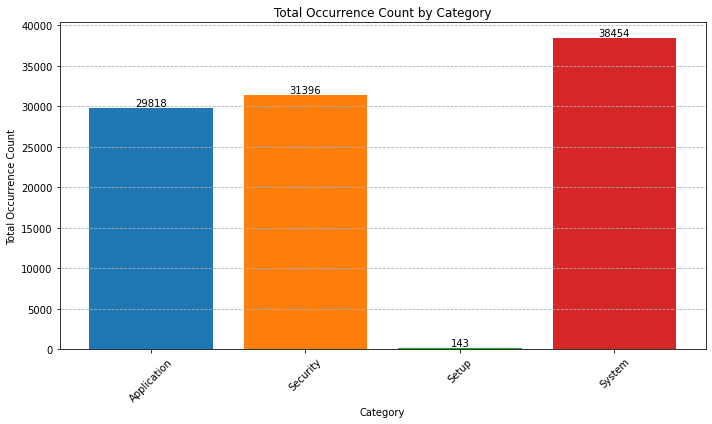

In [24]:
# Group the data by Category and calculate the total occurrence count for each category
category_counts = event_id_df.groupby("Category")["Occurrence Count"].sum()

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Plot a bar chart with colored bars to visualize the total occurrence count for each category

# Define a color palette for the categories
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot a bar chart with colored bars to visualize the total occurrence count for each category
plt.bar(category_counts.index, category_counts.values, color=colors)

# Customize the plot
plt.xlabel("Category")
plt.ylabel("Total Occurrence Count")
plt.title("Total Occurrence Count by Category")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--')

# Add data labels to the bars
for i, count in enumerate(category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

#### 3. Extracting Levels and Occurrence Counts for Different Categories

To analyze the levels present in the log files, we focus on the categories "Application," "Setup," and "System" since the "Security" category does not have levels.

Level Analysis: Calculate the frequency of different levels (information, warning, error,...) in the "level" column. Visualize the distribution using a bar chart.

The idea in this code is to analyze the occurrence of levels within specific categories ("Application", "Setup", and "System"). The code iterates over each category, counts the occurrences of different levels in the "Level" column, and stores the results in a DataFrame called levels_df.

In [25]:
# security will not be here becaue it doesn't have levles
categories = ["Application", "Setup", "System"]
# Create an empty DataFrame to store the results
levels_df = pd.DataFrame(columns=["Category", "Level", "Occurrence Count"])

# Iterate over each category
for category in categories :
    # Count the occurrences of levels in the current category
    level_counts = logs_df.loc[category]["Level"].value_counts()
    
    # Create a DataFrame for the current category's Event IDs and occurrence counts
    category_df = pd.DataFrame({"Category": category, "Level": level_counts.index, 
                                "Occurrence Count": level_counts.values})
    
    # Append the category DataFrame to the result DataFrame
    levels_df = pd.concat([levels_df, category_df], ignore_index=True)

# Print the resulting DataFrame
levels_df

Category        Level Occurrence Count
0  Application  Information            25804
1  Application        Error             3466
2  Application      Warning              548
3        Setup  Information              143
4       System  Information            31036
5       System      Warning             6069
6       System        Error             1336
7       System     Critical               13

In [26]:
# Extract levels and occurrence counts for the "Application" category
application_levels = (levels_df[levels_df["Category"] == "Application"][["Level", "Occurrence Count"]])

# Extract levels and occurrence counts for the "Setup" category
setup_levels = levels_df[levels_df["Category"] == "Setup"][["Level", "Occurrence Count"]]

# Extract levels and occurrence counts for the "System" category
system_levels = levels_df[levels_df["Category"] == "System"][["Level", "Occurrence Count"]]

The following code generates pie charts to visualize the occurrence count of different log levels in three categories: Application, Setup, and System. Each pie chart represents the distribution of log levels within a specific category.

The resulting pie charts provide a clear overview of the log level distribution within each category, allowing for easy comparison and identification of the most prevalent log levels.

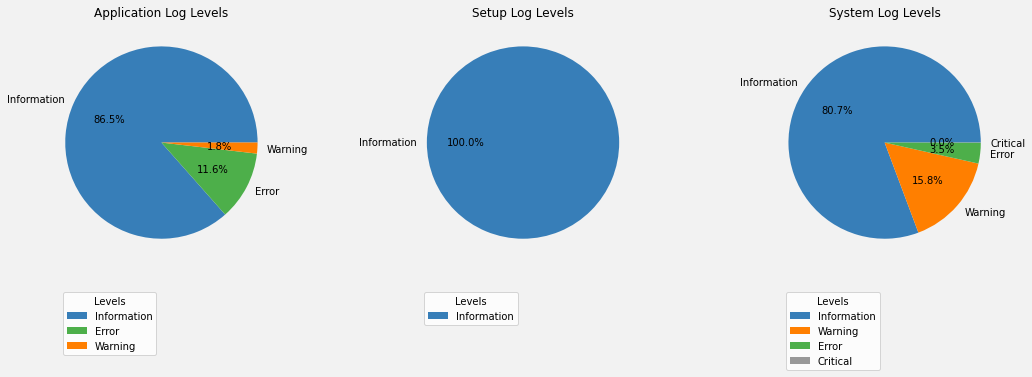

In [27]:
# Define a dictionary to map levels to colors
level_colors = {
    "Information": "#377eb8",
    "Warning": "#ff7f00",
    "Error": "#4daf4a",
}

# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the background color of the figure
fig.patch.set_facecolor("#f2f2f2")

# Plotting pie chart for Application category
axes[0].pie(application_levels["Occurrence Count"], labels=application_levels["Level"], autopct='%1.1f%%',
            colors=[level_colors.get(level, "#999999") for level in application_levels["Level"]])
axes[0].set_title("Application Log Levels")
axes[0].set_aspect('equal')
axes[0].legend(title="Levels", loc="best", bbox_to_anchor=(0.5, -0.1))

# Plotting pie chart for Setup category
axes[1].pie(setup_levels["Occurrence Count"], labels=setup_levels["Level"], autopct='%1.1f%%',
            colors=[level_colors.get(level, "#999999") for level in setup_levels["Level"]])
axes[1].set_title("Setup Log Levels")
axes[1].set_aspect('equal')
axes[1].legend(title="Levels", loc="best", bbox_to_anchor=(0.5, -0.1))

# Plotting pie chart for System category
axes[2].pie(system_levels["Occurrence Count"], labels=system_levels["Level"], autopct='%1.1f%%',
            colors=[level_colors.get(level, "#999999") for level in system_levels["Level"]])
axes[2].set_title("System Log Levels")
axes[2].set_aspect('equal')
axes[2].legend(title="Levels", loc="best", bbox_to_anchor=(0.5, -0.1))

# Add a beautiful grid to the subplots
for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

#### 4. Temporal Analysis - Log Entries Over Time
The following code performs a temporal analysis on the log entries in the combined DataFrame `logs_df`. It plots a line chart to visualize the number of log entries over time for each category

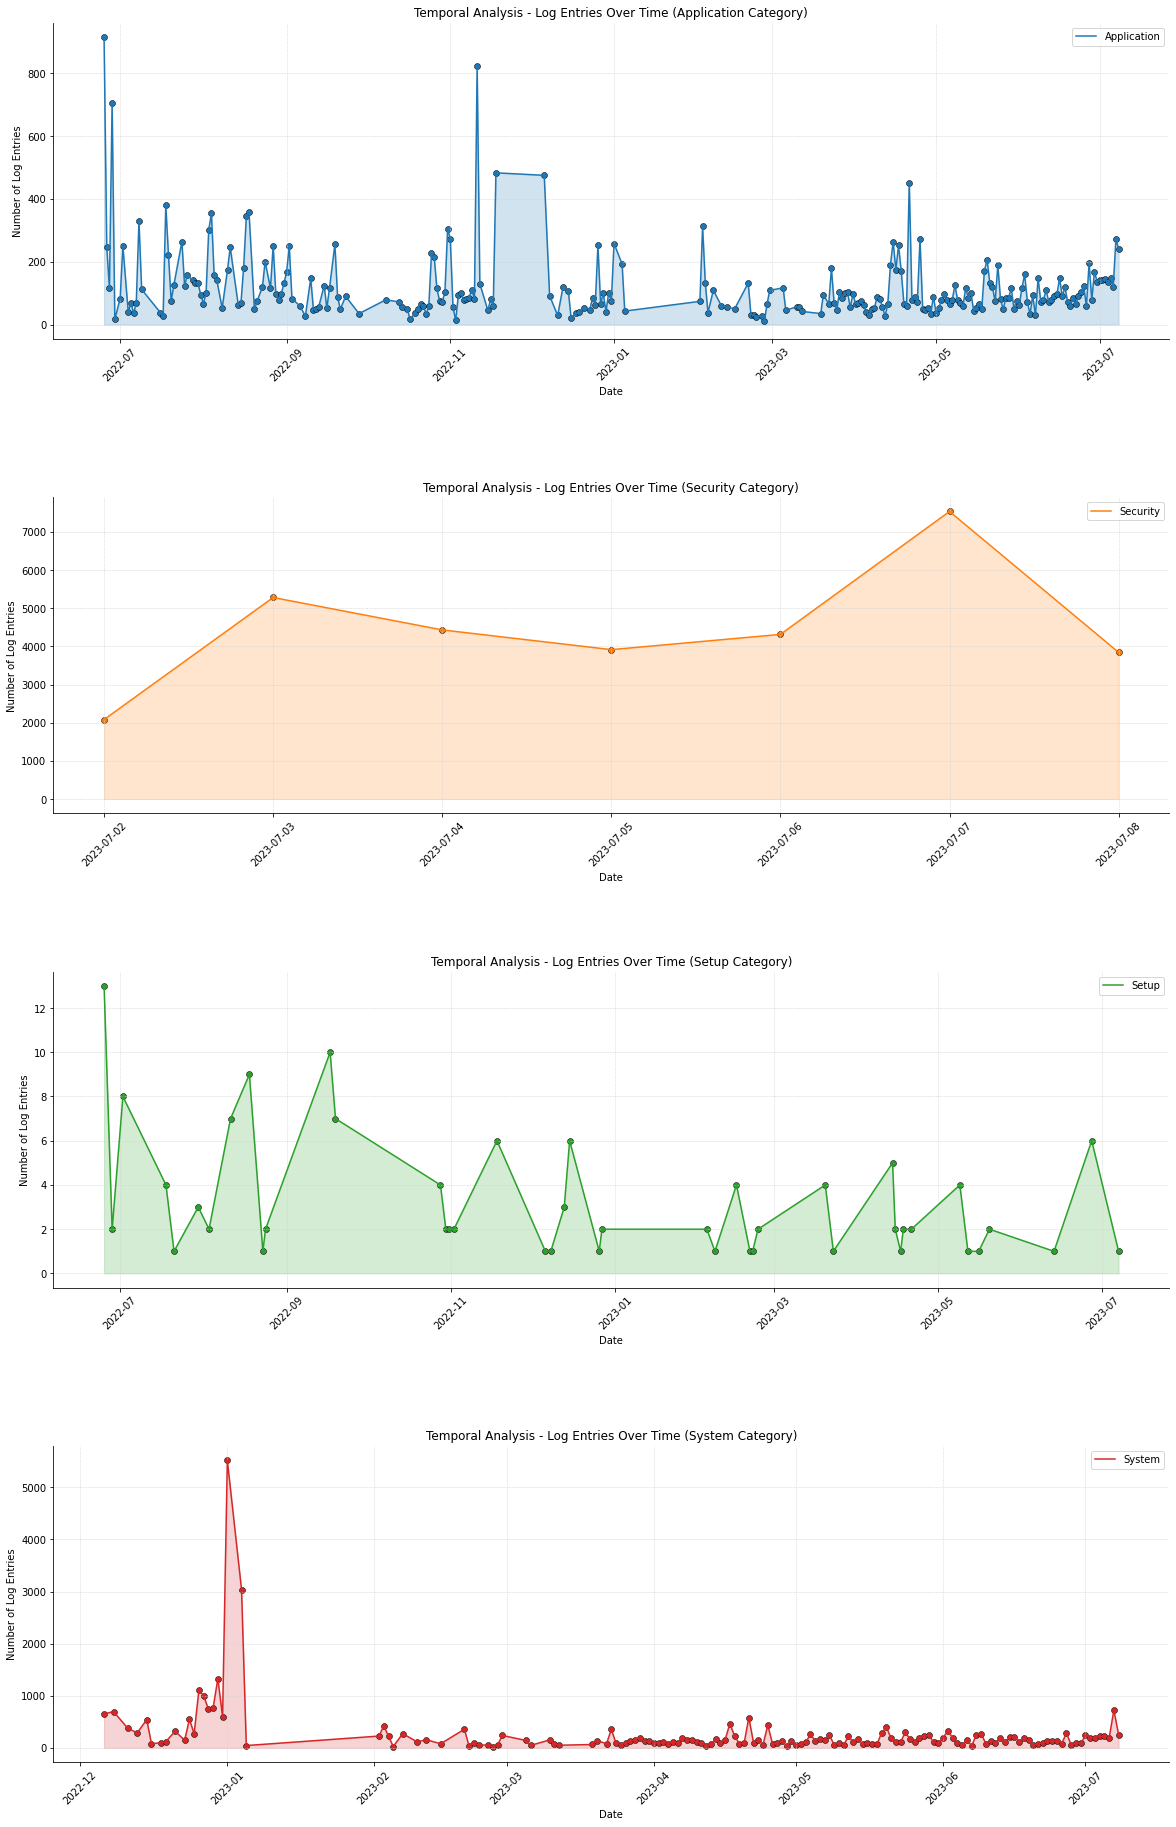

In [28]:
# Convert the "Date and Time" column to datetime format
logs_df["Date and Time"] = pd.to_datetime(logs_df["Date and Time"], format="%m/%d/%Y %I:%M:%S %p")

# Set the figure size and number of subplots
fig, axs = plt.subplots(len(logs_df.index.levels[0]), 1, figsize=(20, 8 * len(logs_df.index.levels[0])))

# Define a color palette for the line charts
colors = sns.color_palette("tab10")

# Iterate over each category
for i, category in enumerate(logs_df.index.levels[0]):
    # Filter the DataFrame for the current category
    category_df = logs_df.loc[category]
    
    # Group the data by date and calculate the count of log entries for each date
    date_counts = category_df.groupby(category_df["Date and Time"].dt.date).size()
    
    # Plot a line chart for the log entry counts over time
    axs[i].plot(date_counts.index, date_counts.values, label=category, color=colors[i % len(colors)])

    # Customize the plot for the current category+_
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Number of Log Entries")
    axs[i].set_title(f"Temporal Analysis - Log Entries Over Time ({category} Category)")
    axs[i].legend()
    axs[i].tick_params(axis="x", rotation=45)
    
    # Set the gridlines and spines
    axs[i].grid(True, linestyle='--', linewidth=0.5, color='lightgray')
    axs[i].spines["top"].set_visible(False)
    axs[i].spines["right"].set_visible(False)
    
    # Add additional visual elements
    axs[i].fill_between(date_counts.index, date_counts.values, color=colors[i % len(colors)], alpha=0.2)
    axs[i].scatter(date_counts.index, date_counts.values, color=colors[i % len(colors)], edgecolor='black', linewidth=0.5)
    
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plots
plt.show()

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Sort the DataFrame by the "Date and Time" column
logs_df.sort_values(by="Date and Time", inplace=True)

# Convert the "Date and Time" column to datetime format
logs_df["Date and Time"] = pd.to_datetime(logs_df["Date and Time"], format="%m/%d/%Y %I:%M:%S %p")

# Calculate the number of log entries for each timestamp within each category
logs_df["Number of Log Entries"] = logs_df.groupby(["Category", "Date and Time"]).cumcount() + 1

# Create an interactive line chart for each category
figs = []
categories = ["Application", "Security", "Setup", "System"]

for category in categories:
    category_df = logs_df.xs(category)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=category_df["Date and Time"], y=category_df["Number of Log Entries"],
                             mode='lines+markers', name='Log Entries', line=dict(color='blue')))
    
    fig.update_layout(title=f"{category} - Log Entries Over Time",
                      xaxis_title="Date and Time",
                      yaxis_title="Number of Log Entries",
                      hovermode="x unified",
                      template="plotly_white",
                      legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                      margin=dict(l=50, r=50, t=80, b=50),
                      )
    
    fig.update_traces(marker=dict(size=5),
                      line=dict(width=2))
    
    figs.append(fig)


**Show the interactive line charts:**

This code below guides users through the process of uploading their Plotly plots to their Plotly account and generating an HTML embed code that can be used to integrate the plot into an HTML file. Remember to replace `'your_username'` and `'your_api_key'` with your actual Plotly account username and API key, and replace `'your_plot_name'` with the desired name for your plot.

In [ ]:
import chart_studio

# Replace with your actual Plotly account username and API key
username = 'your_username'
api_key = 'your_api_key'

# Set the Plotly credentials
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

import chart_studio.plotly as py
import chart_studio.tools as tls

# Assuming you have defined 'fig_name' previously
# Replace 'fig_name' with the actual variable containing your plotly figure

# Upload the plot to your Plotly account
plot_url = py.plot(fig_name, filename='your_plot_name', auto_open=False)

# Generate an HTML code snippet to embed the plot in an HTML file
html_embed_code = tls.get_embed(plot_url)

# Print the plot's URL and the HTML embed code
print("Plot URL:", plot_url)
print("HTML Embed Code:")
print(html_embed_code)

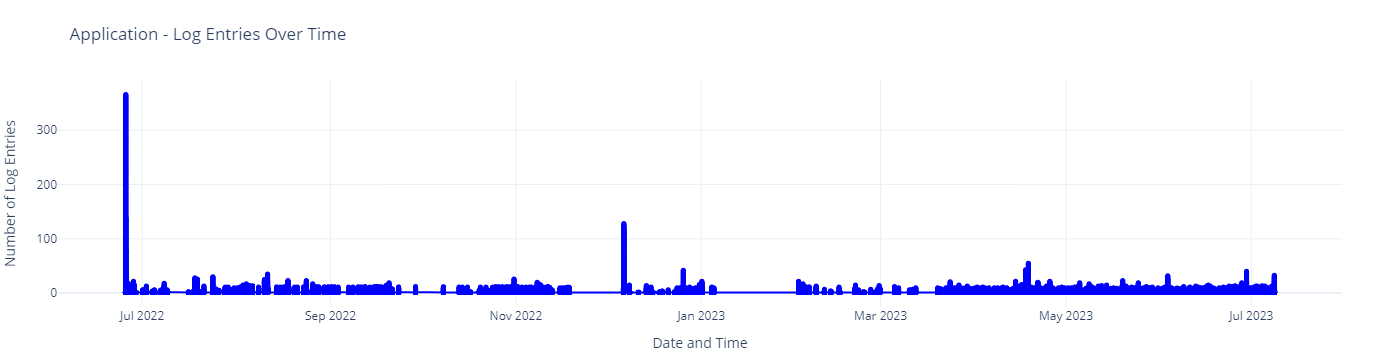

In [47]:
figs[0]
#py.plot(figs[0], fig_name='Application-log Entries Over Time-(Log File Analysis)', auto_open=True)

**Note:** These images showcase the interactive plot's visual representation. I haven't included the actual interactive plot itself at this time, as I'm exploring options for hosting it on a server. Hosting all the plots across my various projects could potentially incur significant costs, which I'm currently considering.

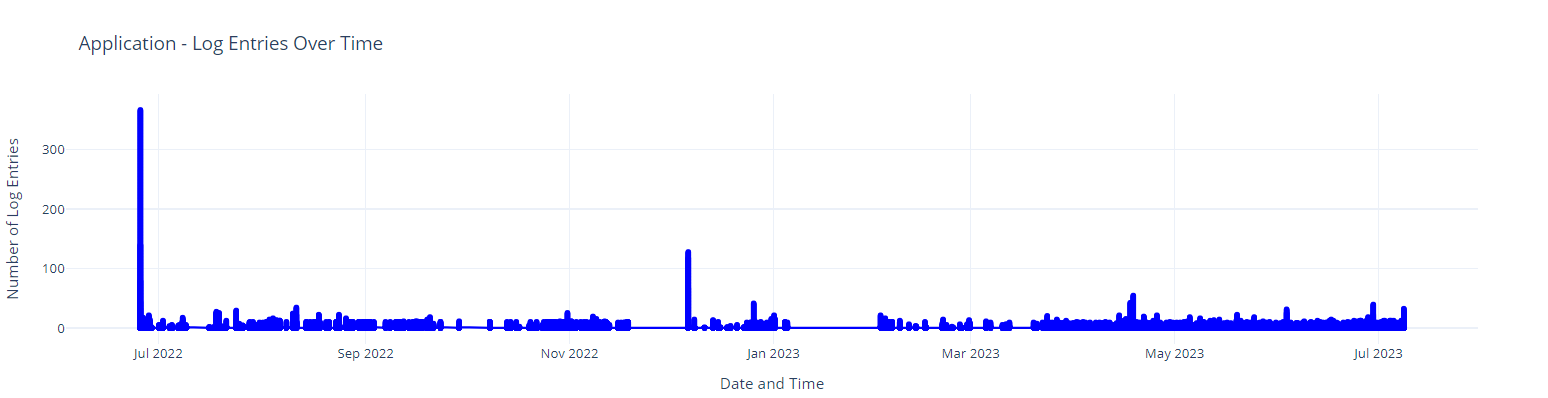
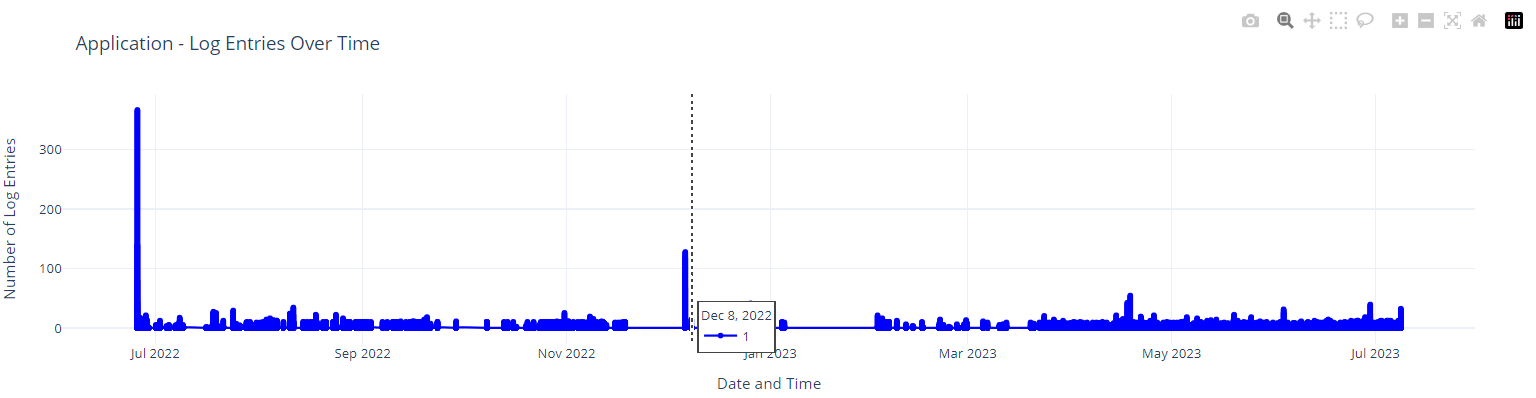

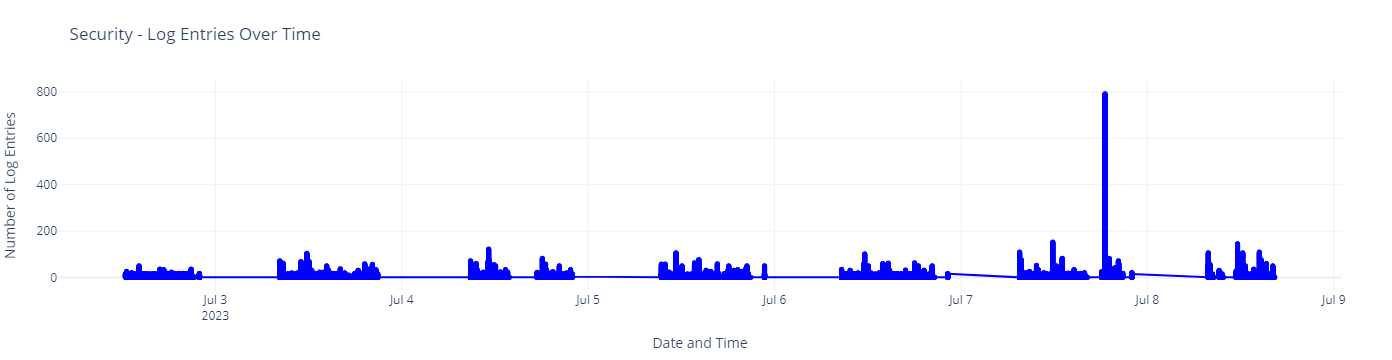

In [48]:
figs[1]
#py.plot(figs[0], fig_name='Security-log Entries Over Time-(Log File Analysis)', auto_open=True)

**Note:** These images showcase the interactive plot's visual representation. I haven't included the actual interactive plot itself at this time, as I'm exploring options for hosting it on a server. Hosting all the plots across my various projects could potentially incur significant costs, which I'm currently considering.

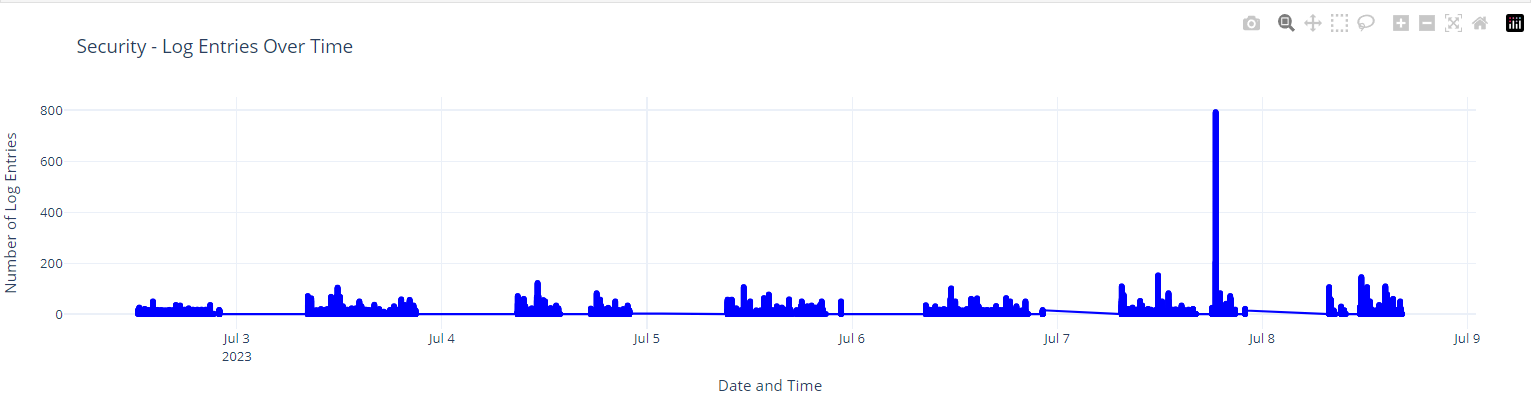
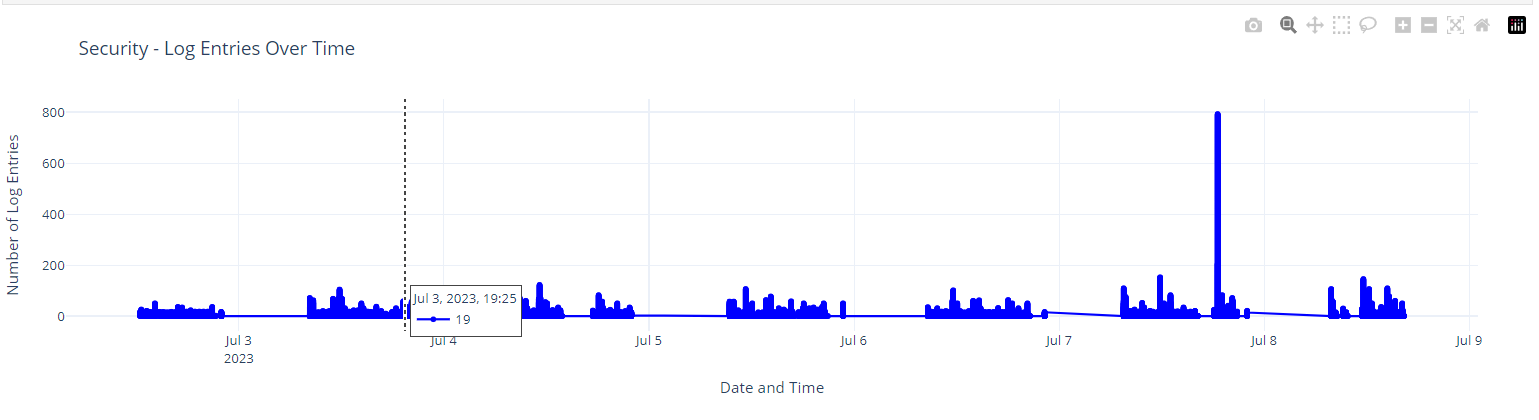

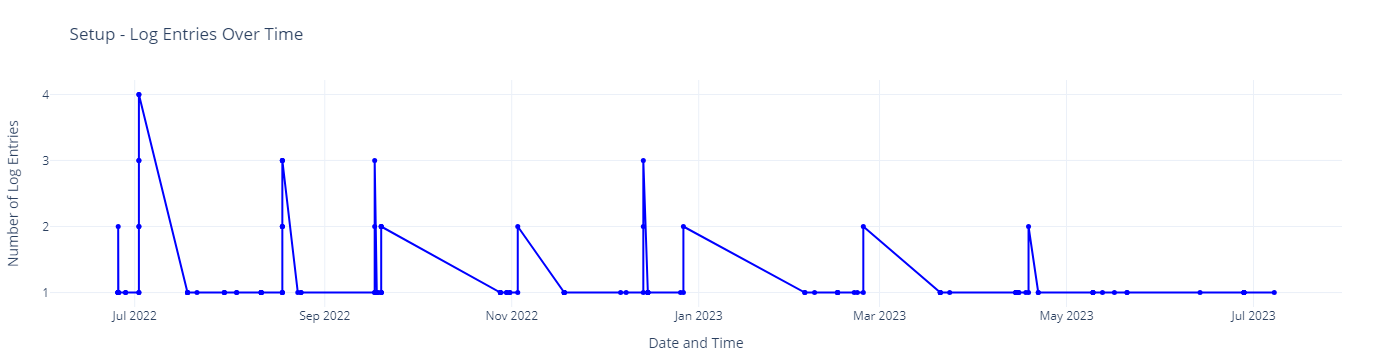

In [49]:
figs[2]
#py.plot(figs[0], fig_name='Setup-log Entries Over Time-(Log File Analysis)', auto_open=False)

**Note:** These images showcase the interactive plot's visual representation. I haven't included the actual interactive plot itself at this time, as I'm exploring options for hosting it on a server. Hosting all the plots across my various projects could potentially incur significant costs, which I'm currently considering.

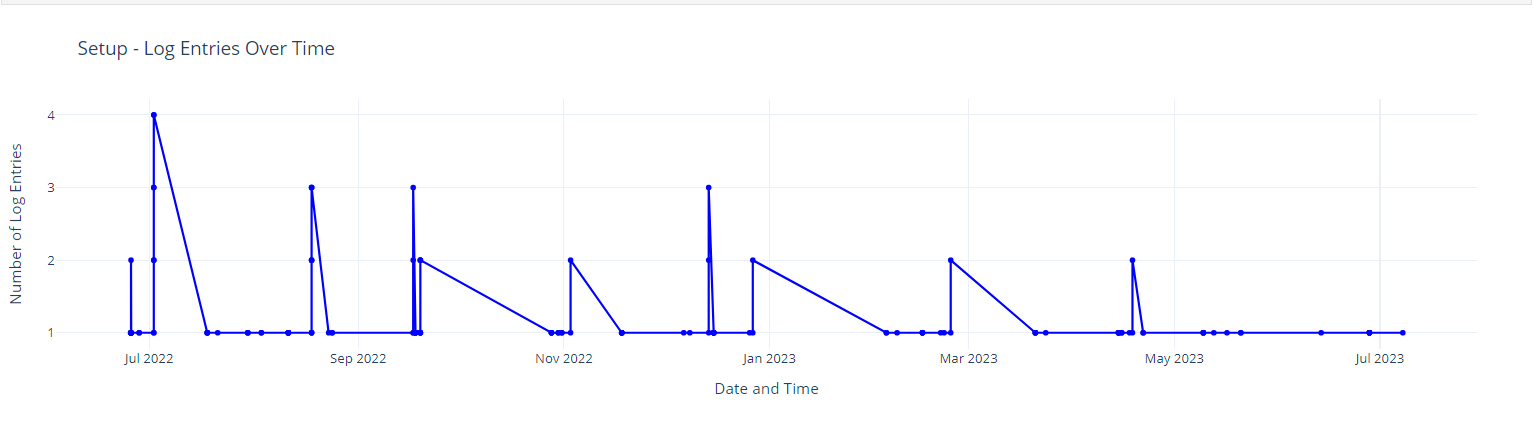
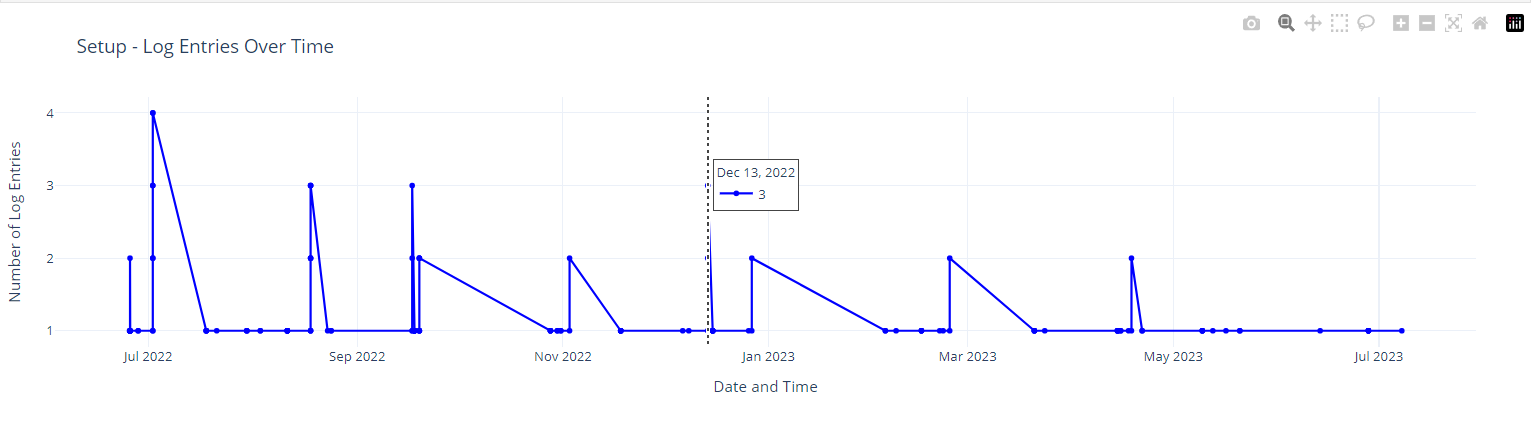

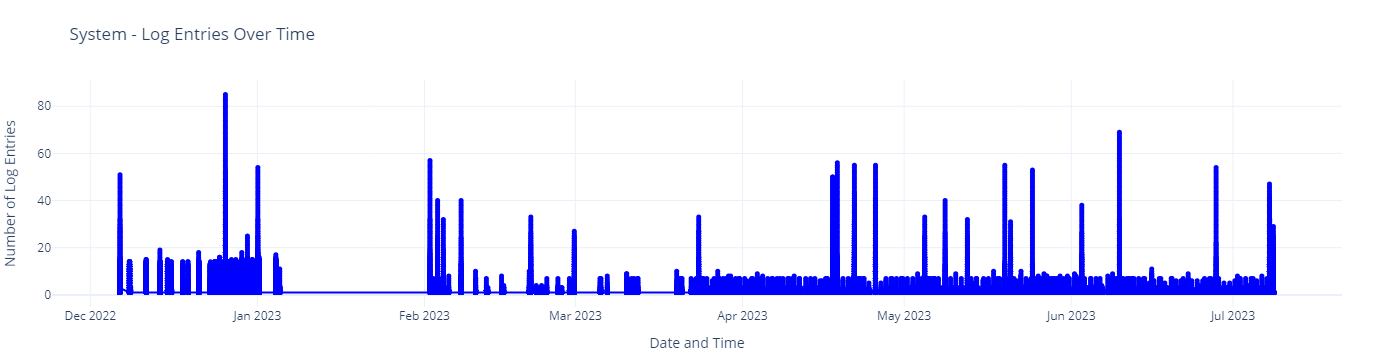

In [50]:
figs[3]
#py.plot(figs[0], fig_name='System-log Entries Over Time-(Log File Analysis)', auto_open=True)

**Note:** These images showcase the interactive plot's visual representation. I haven't included the actual interactive plot itself at this time, as I'm exploring options for hosting it on a server. Hosting all the plots across my various projects could potentially incur significant costs, which I'm currently considering.

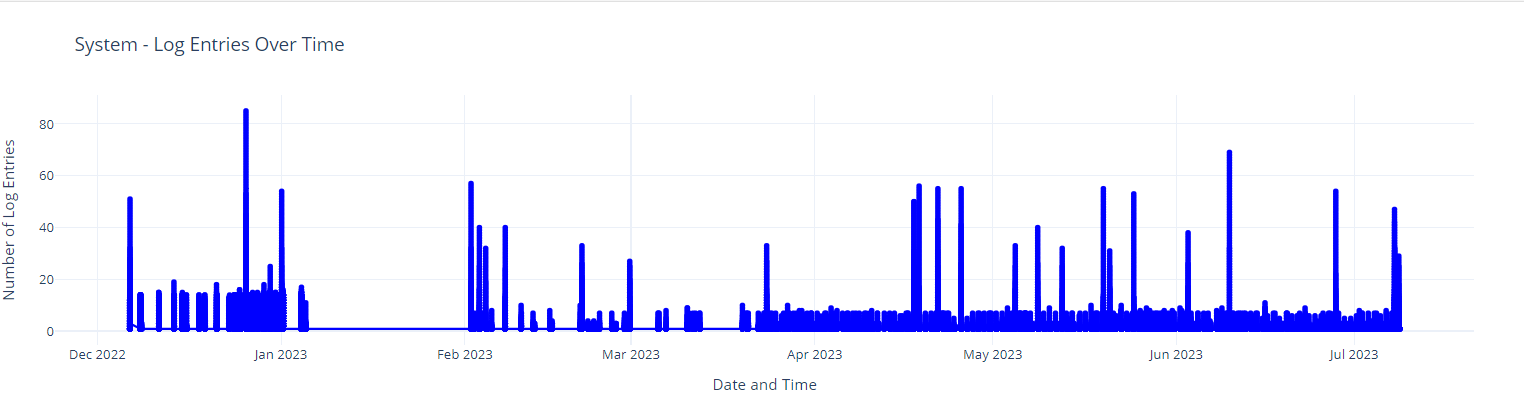
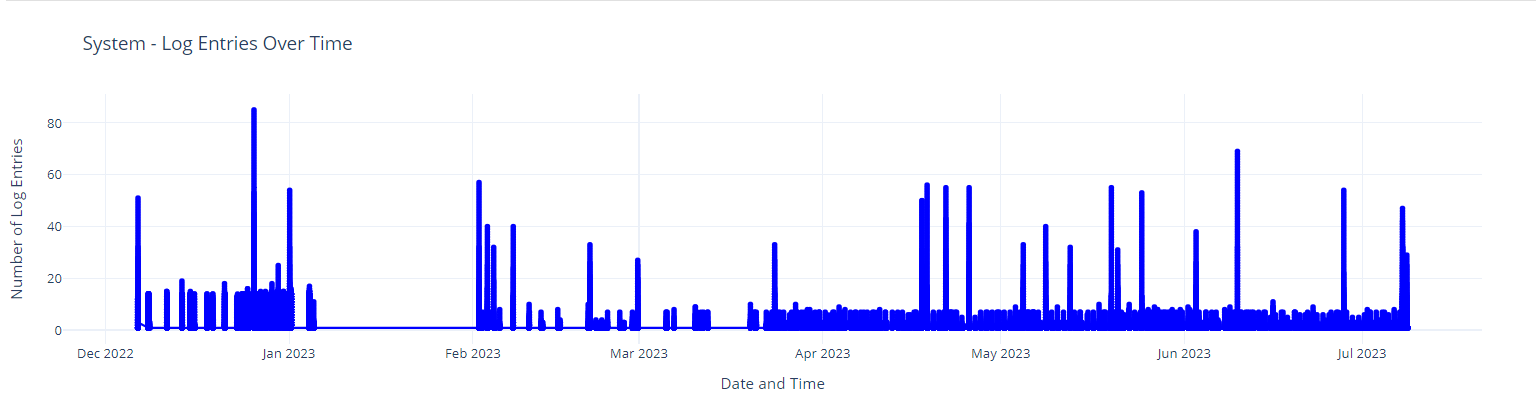

### 5. Interactive Line Chart for Temporal Analysis of Log Entries by level

The following code creates an interactive line chart to analyze the number of log entries over time using the "Date and Time" column. The line chart allows you to select the category and level to visualize specific log entries.

1. Convert the "Date and Time" column to datetime format.
2. Create a function to plot the line chart for a given category and level.
3. Define interactive dropdowns for category and level selection.
4. Link the dropdowns to the update function that triggers the line chart update based on the selected values.
5. Display the interactive dropdowns to select the category and level.

To use the code, ensure you have the required libraries imported: pandas, matplotlib, seaborn, and ipywidgets. Adjust the code as needed to match your DataFrame and column names.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Dropdown

# Convert the "Date and Time" column to datetime format
logs_df["Date and Time"] = pd.to_datetime(logs_df["Date and Time"], format="%m/%d/%Y %I:%M:%S %p")

# Create a function to plot the line chart for a given category and level
def plot_line_chart(category, level):
    # Filter the DataFrame for the selected category
    category_df = logs_df.loc[category]
    
    # Check if the selected level exists in the filtered DataFrame
    if level not in category_df["Level"].unique():
        print(f"The level '{level}' is not available for the '{category}' category.")
        return
    
    # Filter the DataFrame for the selected level
    level_df = category_df[category_df["Level"] == level]
    
    # Group the data by date and calculate the count of log entries for each date
    date_counts = level_df.groupby(level_df["Date and Time"].dt.date).size()
    
    # Plot the line chart for the log entry counts over time
    plt.figure(figsize=(20, 12))
    plt.plot(date_counts.index, date_counts.values, color='blue')
    
    # Customize the plot
    plt.xlabel("Date")
    plt.ylabel("Number of Log Entries")
    
    plt.title("Temporal Analysis - Log Entries Over Time")
    plt.text(0.8, 0.95, f"Category: {category}", weight="bold", ha="center", transform=plt.gca().transAxes)
    plt.text(0.8, 0.9, f"Level: {level}", weight="bold", ha="center", transform=plt.gca().transAxes)
    
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
    plt.fill_between(date_counts.index, date_counts.values, color='blue', alpha=0.2)
    plt.scatter(date_counts.index, date_counts.values, color='blue', edgecolor='black', linewidth=0.5)
    
    # Show the plot
    plt.show()

# Decorate the function with interact to create interactive dropdowns
@interact(category=Dropdown(options=logs_df.index.levels[0], description="Category:"),
          level=Dropdown(options=logs_df["Level"].dropna().unique(), description="Level:"))
def interactive_line_chart(category, level):
    plot_line_chart(category, level)

interactive(children=(Dropdown(description='Category:', options=('Application', 'Security', 'Setup', 'System')…

**Note:** These images showcase the interactive plot's visual representation. I haven't included the actual interactive plot itself at this time, as I'm exploring options for hosting it on a server. Hosting all the plots across my various projects could potentially incur significant costs, which I'm currently considering.

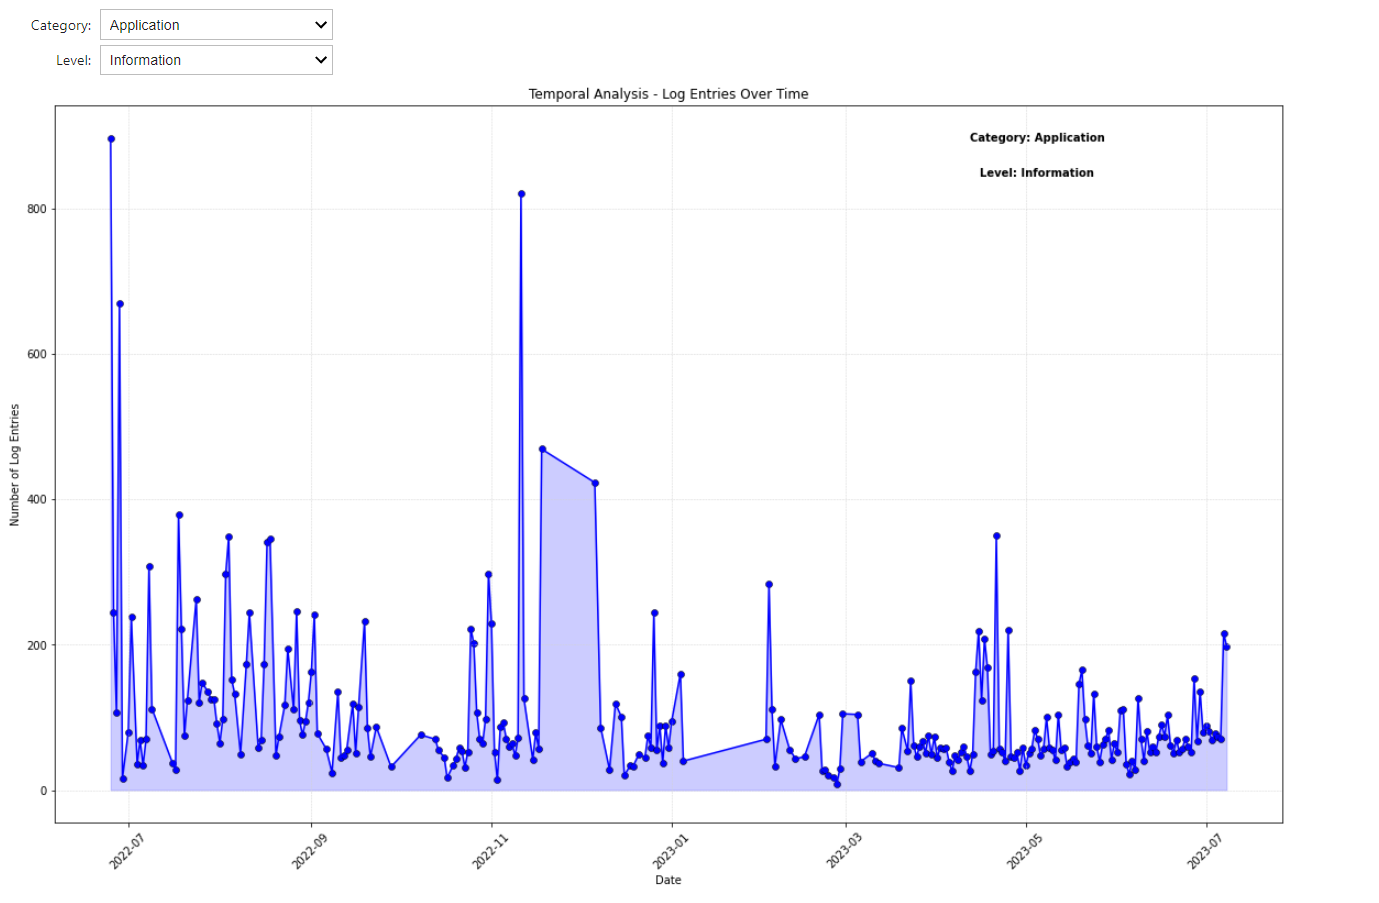
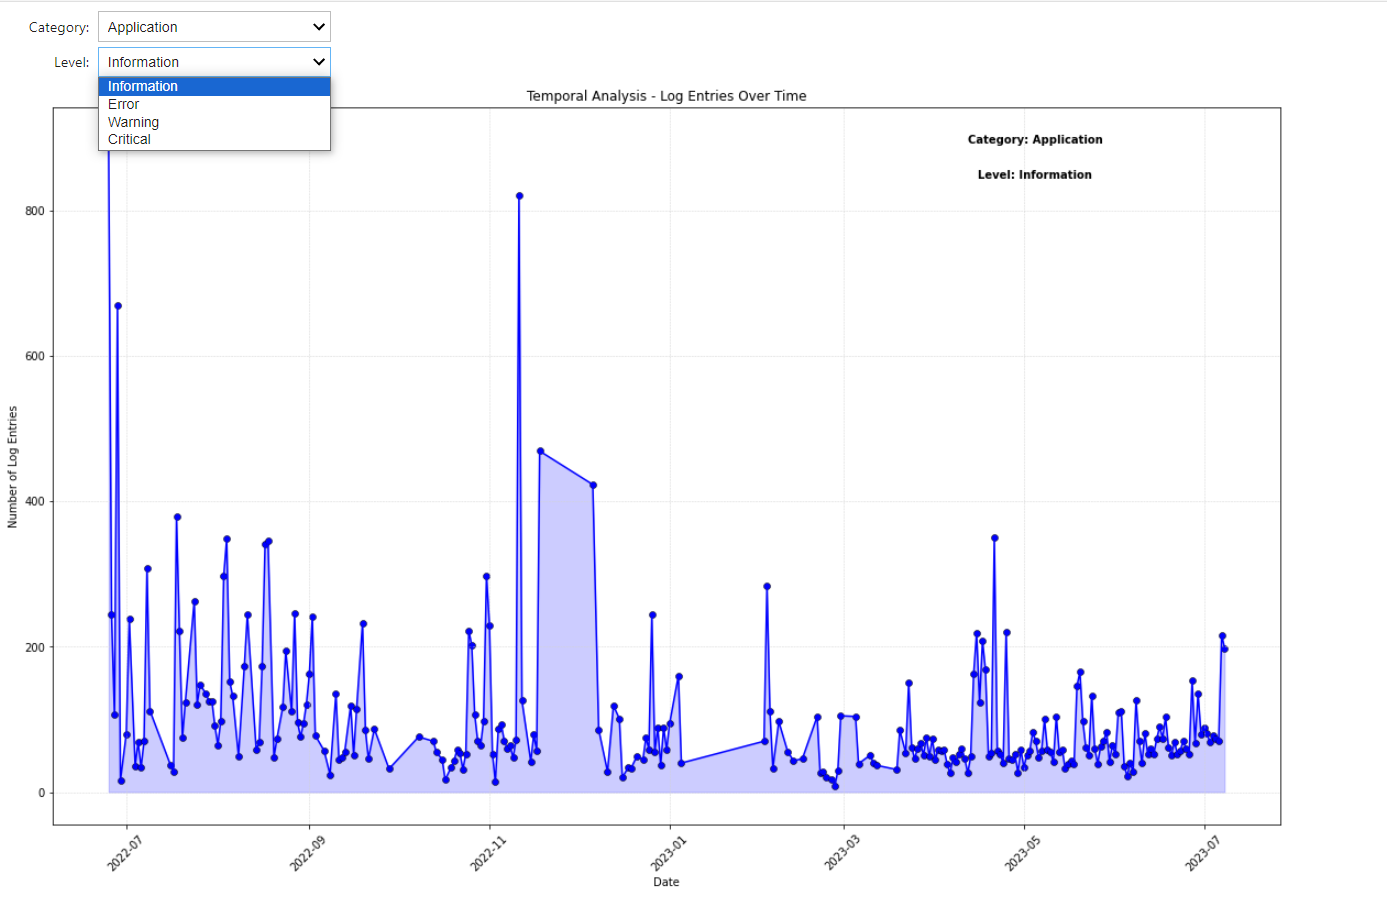

### 6. Source Analysis: Top Sources of Log Entries

In this analysis, we will determine the most frequent sources of log entries for each category. The "source" column contains information about the source of each log entry. We will visualize the top sources using a bar chart for each category.

### Category-wise Analysis

We will perform the source analysis for the following categories: Application, Security, Setup, and System. For each category, we will generate a separate bar chart displaying the top sources based on their frequency.

Let's proceed with the code below:

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function to perform source analysis for a given category
def perform_source_analysis(category):
    # Filter the DataFrame for the selected category
    category_df = logs_df.loc[category]
    
    # Count the occurrences of each source in the category
    source_counts = category_df["Source"].value_counts()
    
    # Select the top 10 sources or all sources if there are less than 10
    top_sources = source_counts.head(10)
    
    # Check if there are more than 10 sources
    if len(source_counts) > 10:
        # Set the figure size based on the number of sources
        figsize = (10, len(source_counts) * 0.5)
    else:
        # Set a default figure size
        figsize = (10, 5)
    
    # Create the bar chart for the top sources
    plt.figure(figsize=figsize)
    sns.barplot(x=top_sources.values, y=top_sources.index, palette="viridis")
    
    # Customize the plot
    plt.xlabel("Occurrence Count")
    plt.ylabel("Source")
    plt.title(f"Top Sources of Log Entries - {category} Category")

    # Add data labels to the bars
    for i, count in enumerate(top_sources.values):
        plt.text(count, i, str(count), ha='left', va='center')
    
    # Show the plot
    plt.show()

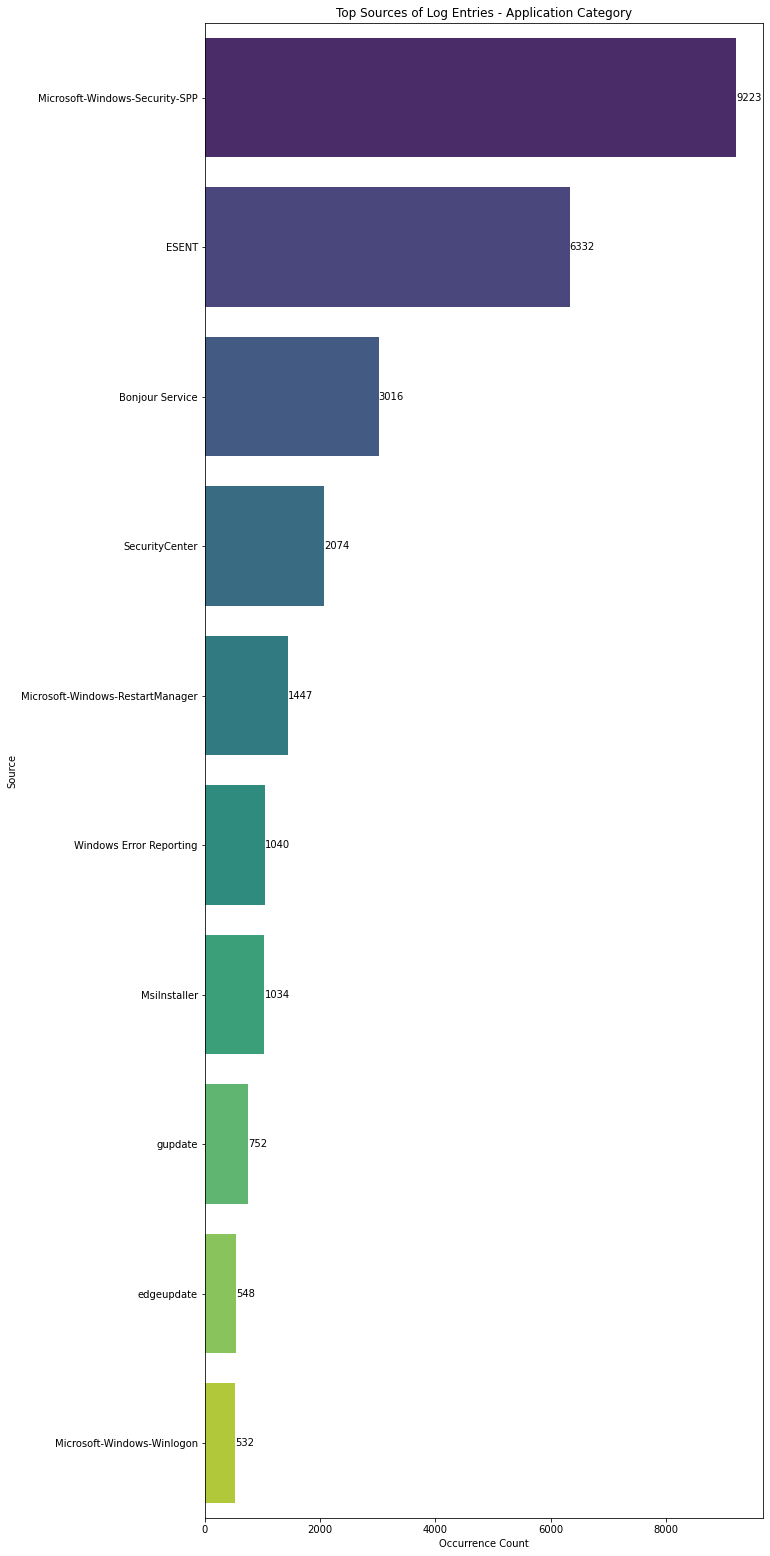

In [52]:
# Perform source analysis for the "Application" category
perform_source_analysis("Application")

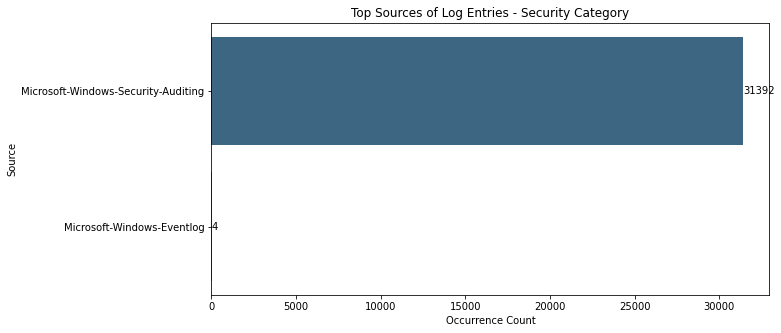

In [53]:
# Perform source analysis for the "Security" category
perform_source_analysis("Security")

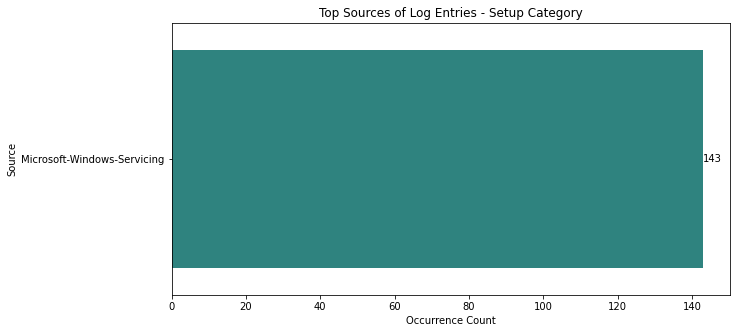

In [54]:
# Perform source analysis for the "Setup" category
perform_source_analysis("Setup")

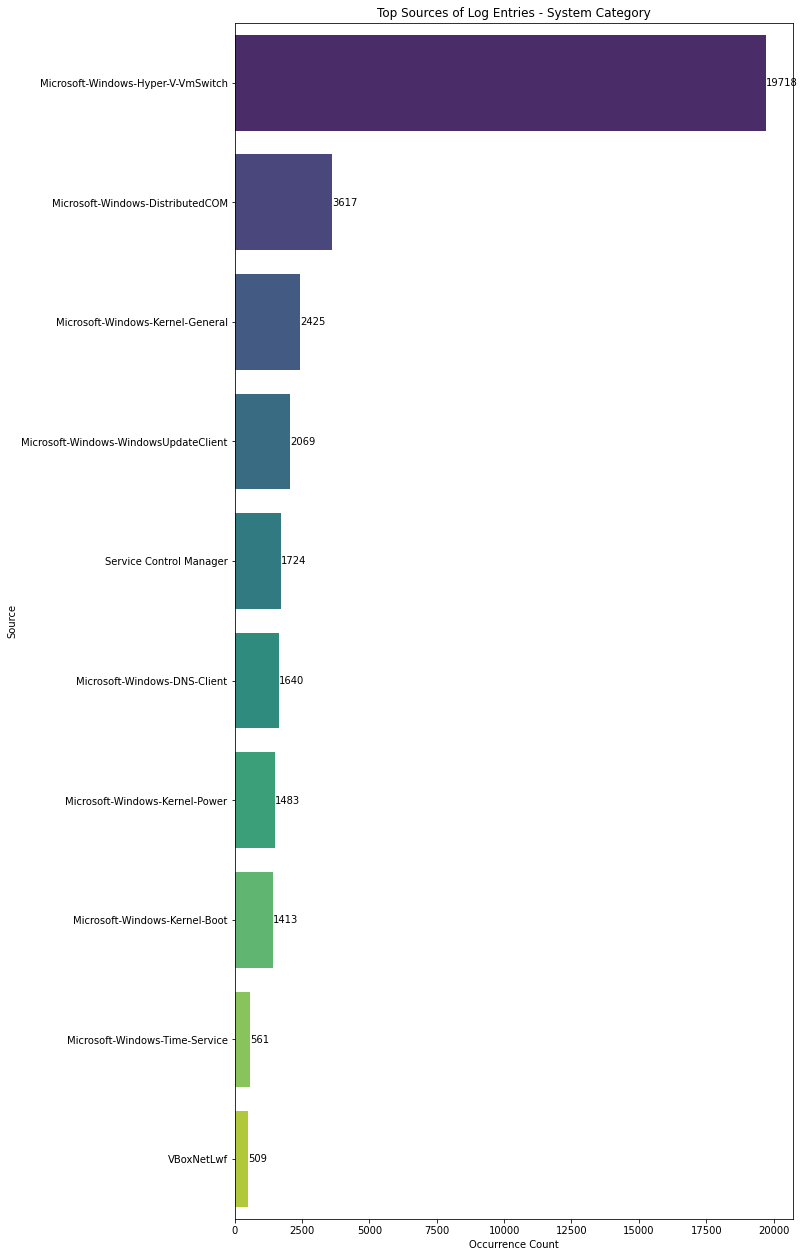

In [55]:
# Perform source analysis for the "System" category
perform_source_analysis("System")

### 7. Event ID Analysis
The Event ID Analysis step involves calculating the frequency of each event ID in the "event id" column and identifying the most common event IDs in each category. This analysis helps us understand the impact and significance of different event IDs in the log files.

Here's the code to perform the Event ID analysis for each category and visualize the results using bar charts:

In [56]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, Dropdown

# Convert the "Date and Time" column to datetime format
logs_df["Date and Time"] = pd.to_datetime(logs_df["Date and Time"], format="%m/%d/%Y %I:%M:%S %p")

# Create a function to plot the bar chart for event ID analysis
def plot_event_id_analysis(category, level):
    # Filter the DataFrame for the selected category
    category_df = logs_df.loc[category]
    
    if level == "All":
        event_id_counts = category_df.index.value_counts().head(10)
    else:
        if level in category_df["Level"].unique():
            category_level_df = category_df[category_df["Level"] == level]
            event_id_counts = category_level_df.index.value_counts().head(10)
        else:
            print(f"The selected level '{level}' is not available for the category '{category}'.")
            return
    
    # Convert event IDs to strings
    # event_id_counts.index = event_id_counts.index.astype(str)
    
    # Get the corresponding task category for each event ID
    task_categories = []
    for event_id in event_id_counts.index:
        task_category = category_df.iloc[event_id]["Task Category"]
        task_categories.append(task_category)
        
    # Convert event IDs to strings    
    event_id_counts.index = event_id_counts.index.astype(str)
    
    # Create a bar chart for the event ID analysis
    if len(event_id_counts) > 1:
        fig = px.bar(event_id_counts, x=event_id_counts.index, y=event_id_counts.values, 
                     color=event_id_counts.index, title=f"<b>Event ID Analysis - {category} Category</b>",
                     labels={"x": "Event ID", "y": "Frequency"}, height=500)
    else:
        fig = px.bar(event_id_counts, x=event_id_counts.index, y=event_id_counts.values, 
                     color=event_id_counts.index, title=f"<b>Event ID Analysis - {category} Category</b>",
                     labels={"x": "Event ID", "y": "Frequency"}, height=500)
    
    # Set the x-axis label to "Event ID"
    fig.update_xaxes(title_text="Event ID")
    
    # Set the color bar label to "Category"
    fig.update_coloraxes(colorbar_title="Category")
    
    # Set the background color
    fig.update_layout(plot_bgcolor='lightgray')
    

    # Show the plot
    fig.show()

# Create interactive dropdowns for category and level selection
category_dropdown = Dropdown(options=logs_df.index.levels[0].drop("Security"), description="Category:")
level_dropdown = Dropdown(options=["All"] + list(logs_df["Level"].dropna().unique()), description="Level:")

# Define the function to update the bar chart based on dropdown selection
@interact(Category=category_dropdown, Level=level_dropdown)
def update_event_id_analysis(Category, Level):
    plot_event_id_analysis(Category, Level)

interactive(children=(Dropdown(description='Category:', options=('Application', 'Setup', 'System'), value='App…

**Note:** These images showcase the interactive plot's visual representation. I haven't included the actual interactive plot itself at this time, as I'm exploring options for hosting it on a server. Hosting all the plots across my various projects could potentially incur significant costs, which I'm currently considering.

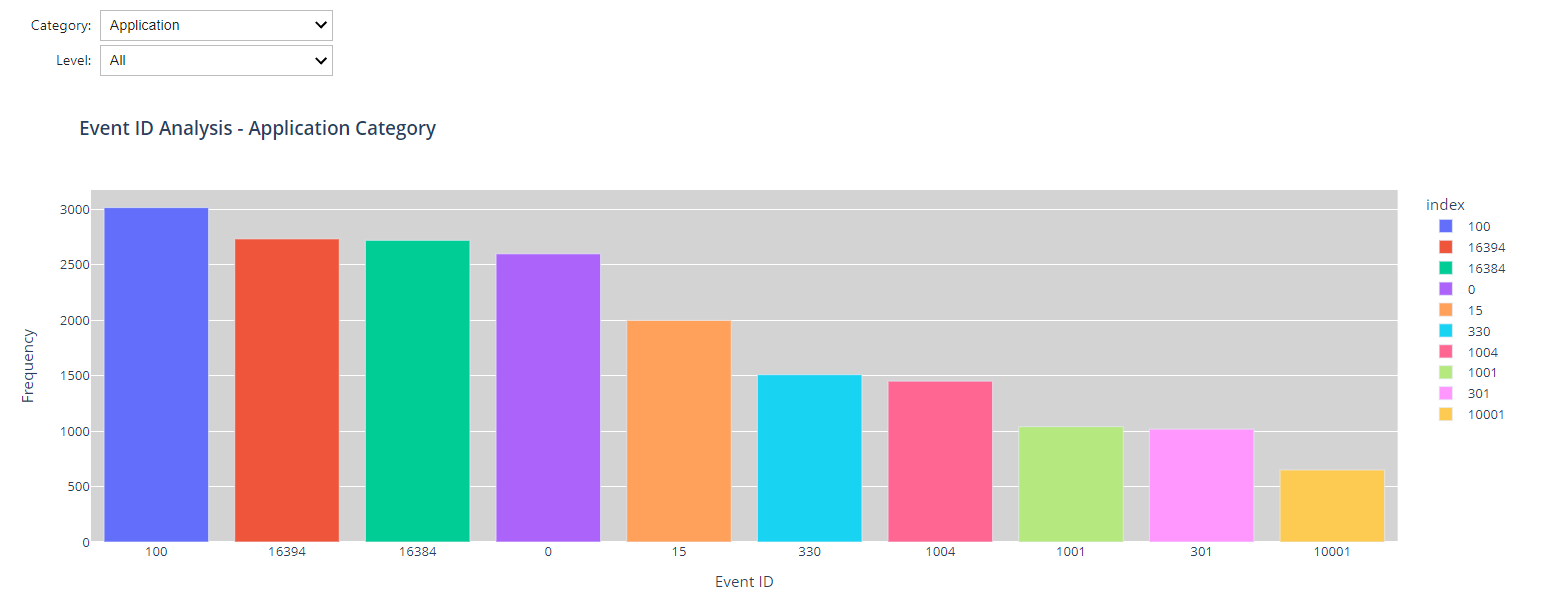
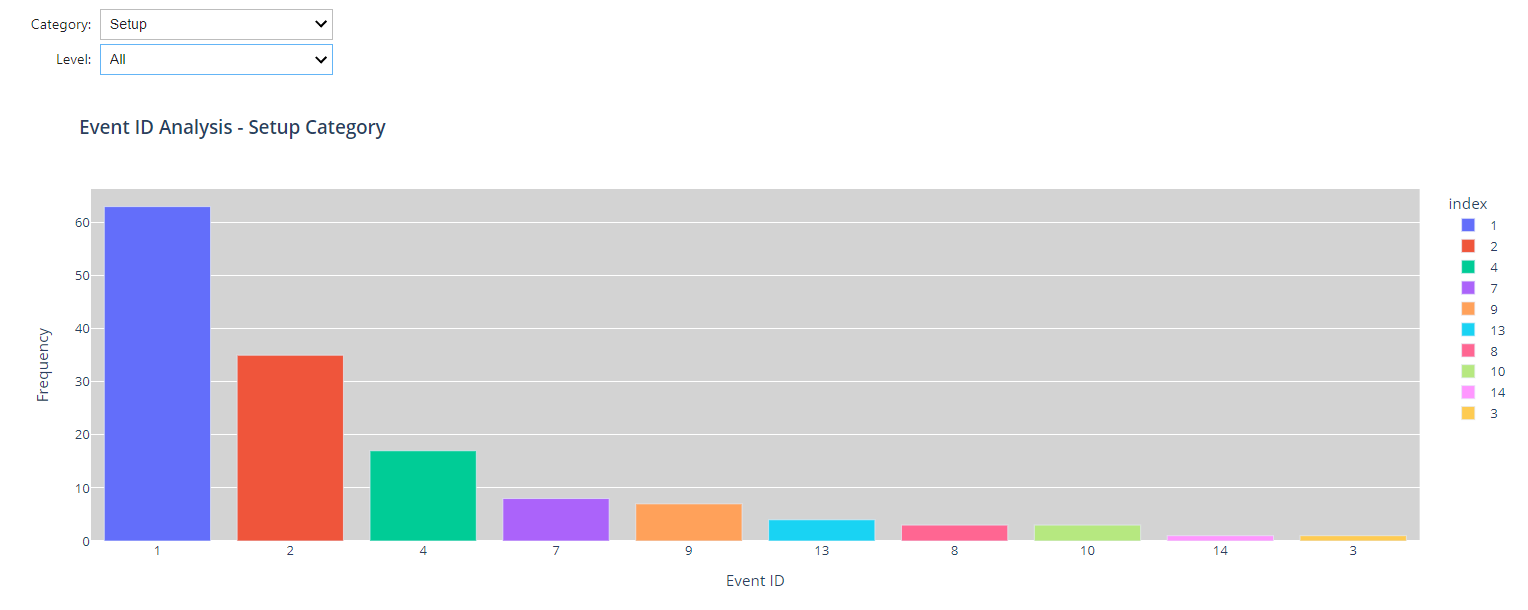